# Imports

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib

c:\Users\ADMIN\anaconda3\envs\rainfall\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Data Ingestion

In [3]:
!mkdir data
%cd data
import urllib.request
import os
print(f"Path exists: {os.path.exists('./rainfall-australia-data.zip')}")
if not os.path.exists("./rainfall-australia-data.zip"):
    url = 'https://github.com/mon28/Datasets/raw/main/rainfall-australia-data.zip'
    urllib.request.urlretrieve(url,'rainfall-australia-data.zip')
    !unzip rainfall-australia-data.zip
os.chdir('../')
%pwd

d:\GitHub Projects\Rainfall-Prediction\research\data
Path exists: True


A subdirectory or file data already exists.


'd:\\GitHub Projects\\Rainfall-Prediction\\research'

In [4]:
df = pd.read_csv("data/weatherAUS.csv")
pd.set_option("display.max_columns", None)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Data Visualization

In [5]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print(f"Numerical Feature Count: {len(numerical_features)}")

discrete_features = [feature for feature in numerical_features if len(df[feature].unique()) < 25 ]
print(f"Discrete Feature Count: {len(discrete_features)}")

continue_features = [feature for feature in numerical_features if feature not in discrete_features]
print(f"Continuous Features Count: {len(continue_features)}")

categorical_features = [feature for feature in df.columns if feature not in numerical_features]
print(f"Categorical Features Count: {len(categorical_features)}")

Numerical Feature Count: 16
Discrete Feature Count: 2
Continuous Features Count: 14
Categorical Features Count: 7


In [6]:
# Handle missing values
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [13]:
print(numerical_features)
print(discrete_features)
print(categorical_features)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
['Cloud9am', 'Cloud3pm']
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [8]:
def random_sample_imputation(df, variable):
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable] = random_sample

In [9]:
# random_sample_imputation(df, "Cloud9am")
# random_sample_imputation(df, "Cloud3pm")
random_sample_imputation(df, "Evaporation")
random_sample_imputation(df, "Sunshine")

In [10]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation       0.000000
Sunshine          0.000000
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

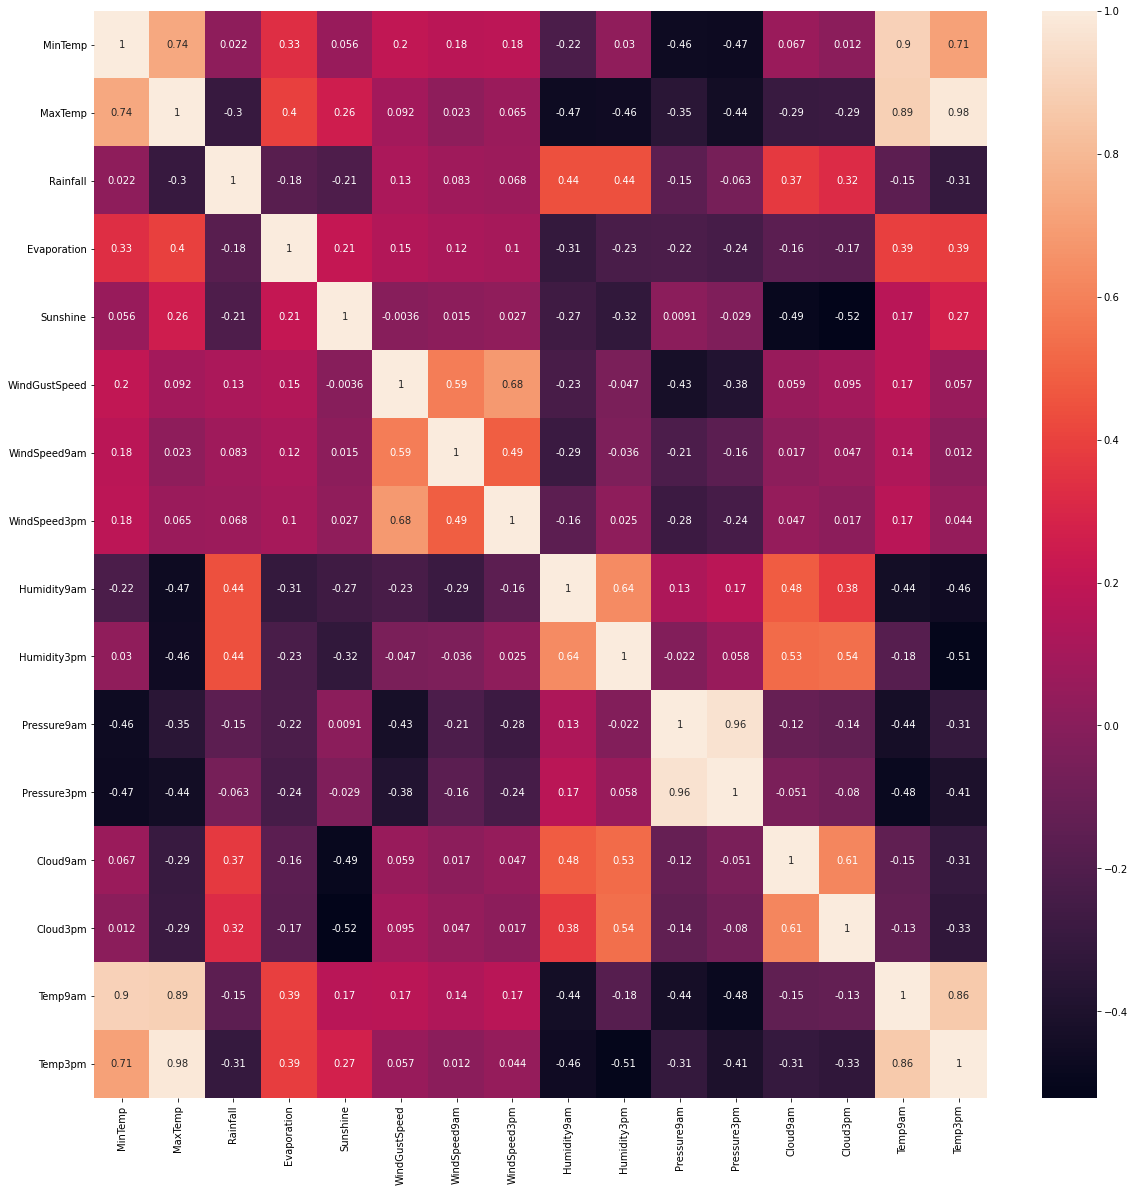

In [11]:
correlation_matrix = df.corr(method="spearman")
plt.figure(figsize=(20, 20))
# plot heat map
g = sns.heatmap(correlation_matrix, annot=True)

c:\Users\ADMIN\anaconda3\envs\rainfall\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


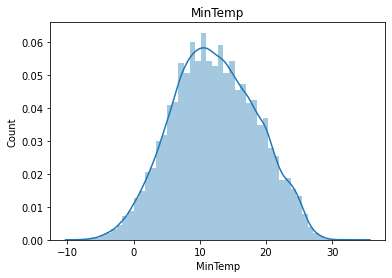

<Figure size 1080x1080 with 0 Axes>

c:\Users\ADMIN\anaconda3\envs\rainfall\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


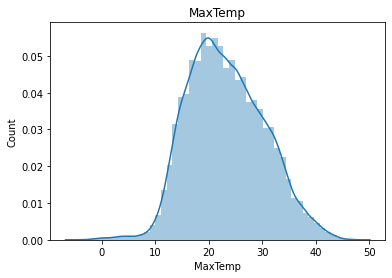

<Figure size 1080x1080 with 0 Axes>

c:\Users\ADMIN\anaconda3\envs\rainfall\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


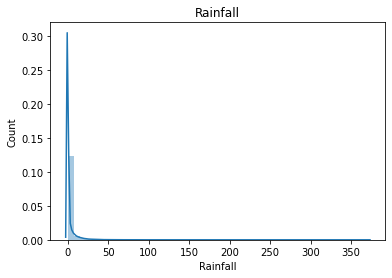

<Figure size 1080x1080 with 0 Axes>

c:\Users\ADMIN\anaconda3\envs\rainfall\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


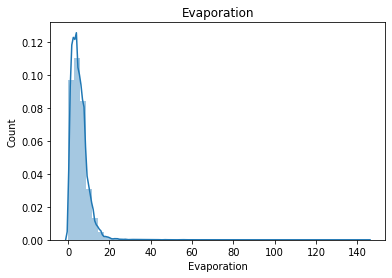

<Figure size 1080x1080 with 0 Axes>

c:\Users\ADMIN\anaconda3\envs\rainfall\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


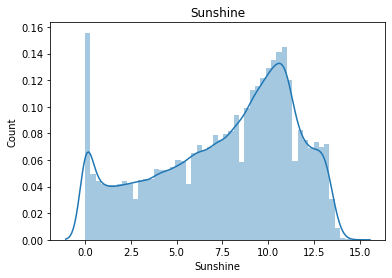

<Figure size 1080x1080 with 0 Axes>

c:\Users\ADMIN\anaconda3\envs\rainfall\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


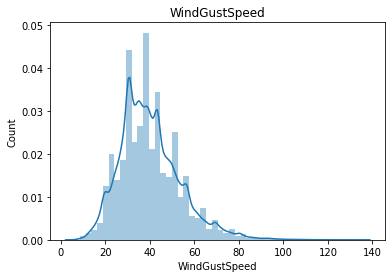

<Figure size 1080x1080 with 0 Axes>

c:\Users\ADMIN\anaconda3\envs\rainfall\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


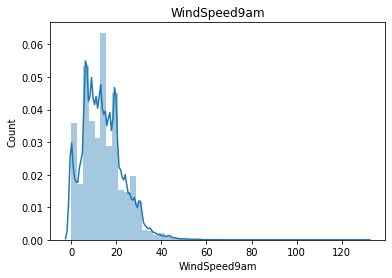

<Figure size 1080x1080 with 0 Axes>

c:\Users\ADMIN\anaconda3\envs\rainfall\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


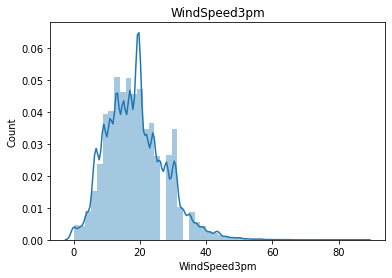

<Figure size 1080x1080 with 0 Axes>

c:\Users\ADMIN\anaconda3\envs\rainfall\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


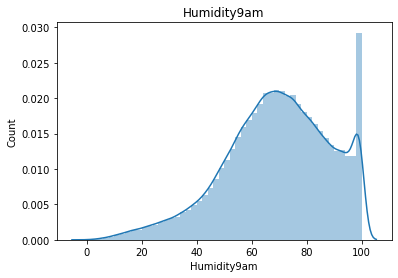

<Figure size 1080x1080 with 0 Axes>

c:\Users\ADMIN\anaconda3\envs\rainfall\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


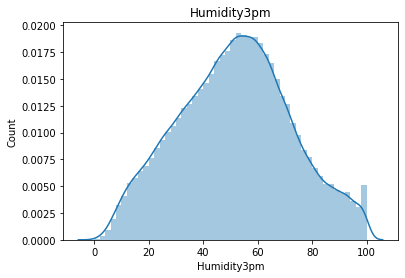

<Figure size 1080x1080 with 0 Axes>

c:\Users\ADMIN\anaconda3\envs\rainfall\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


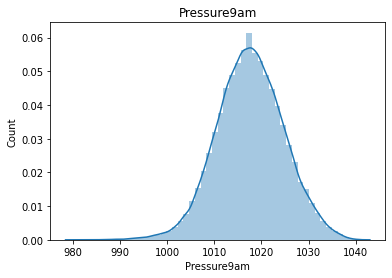

<Figure size 1080x1080 with 0 Axes>

c:\Users\ADMIN\anaconda3\envs\rainfall\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


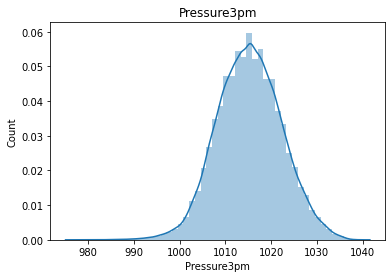

<Figure size 1080x1080 with 0 Axes>

c:\Users\ADMIN\anaconda3\envs\rainfall\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


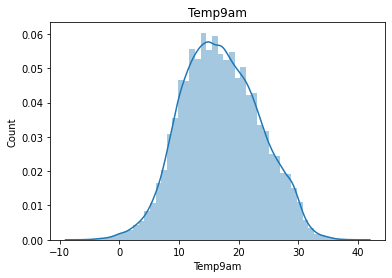

<Figure size 1080x1080 with 0 Axes>

c:\Users\ADMIN\anaconda3\envs\rainfall\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


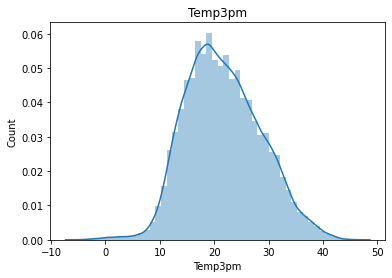

<Figure size 1080x1080 with 0 Axes>

In [12]:
for feature in continue_features:
    data = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(15,15))
    plt.show()

c:\Users\ADMIN\anaconda3\envs\rainfall\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ADMIN\anaconda3\envs\rainfall\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ADMIN\anaconda3\envs\rainfall\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

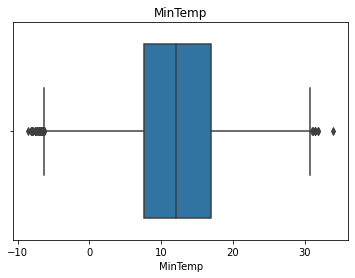

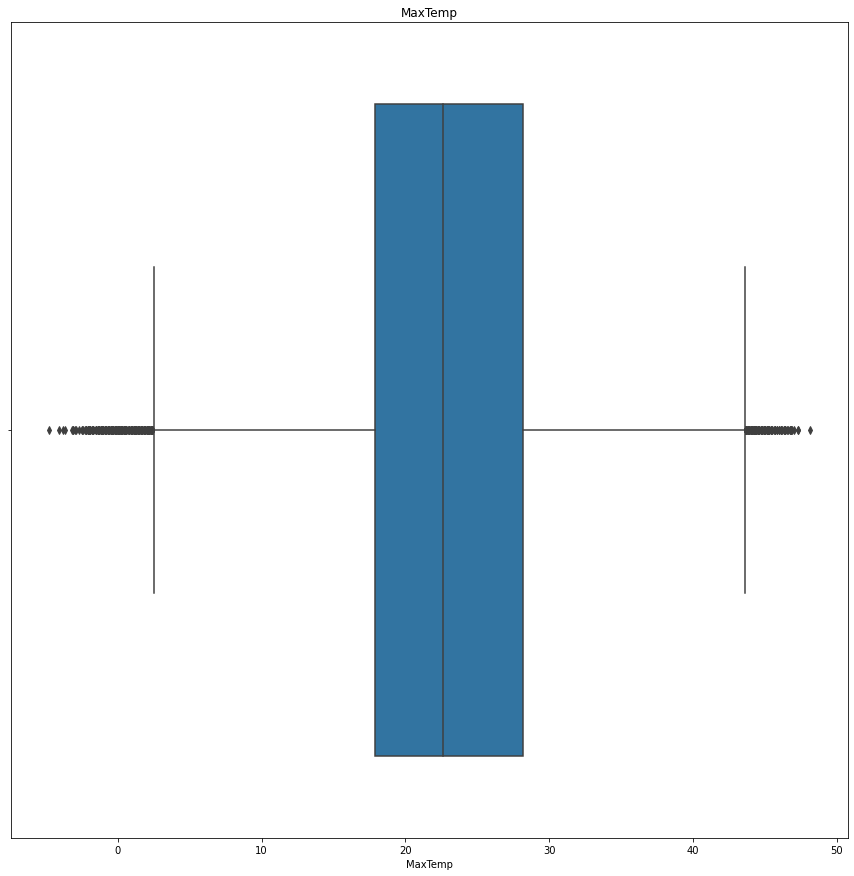

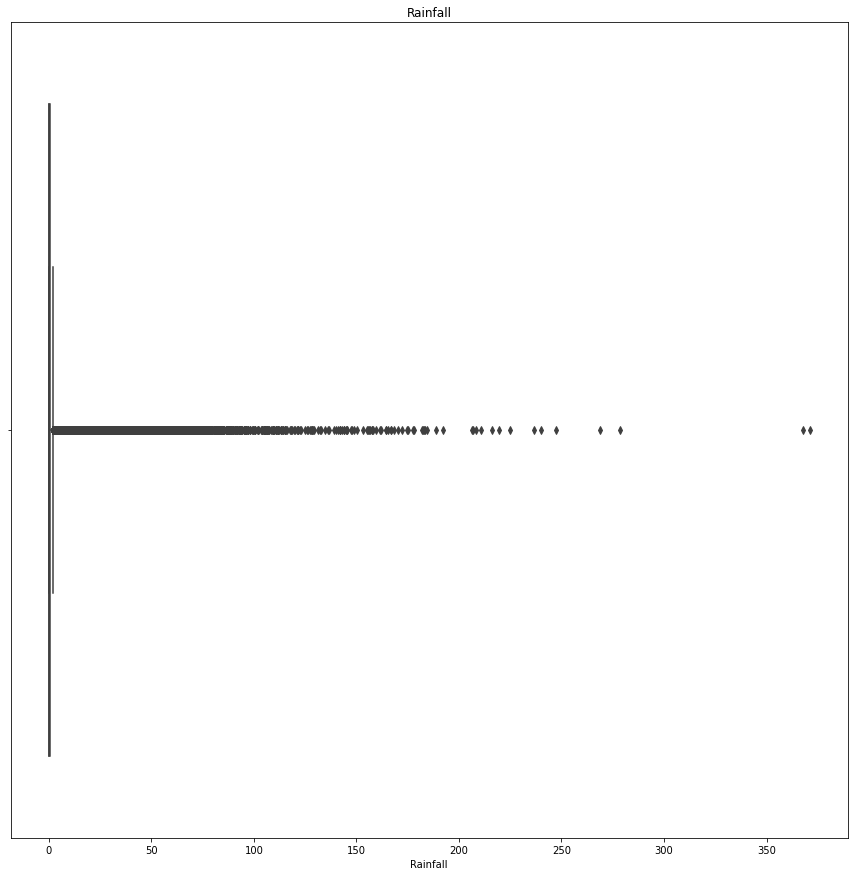

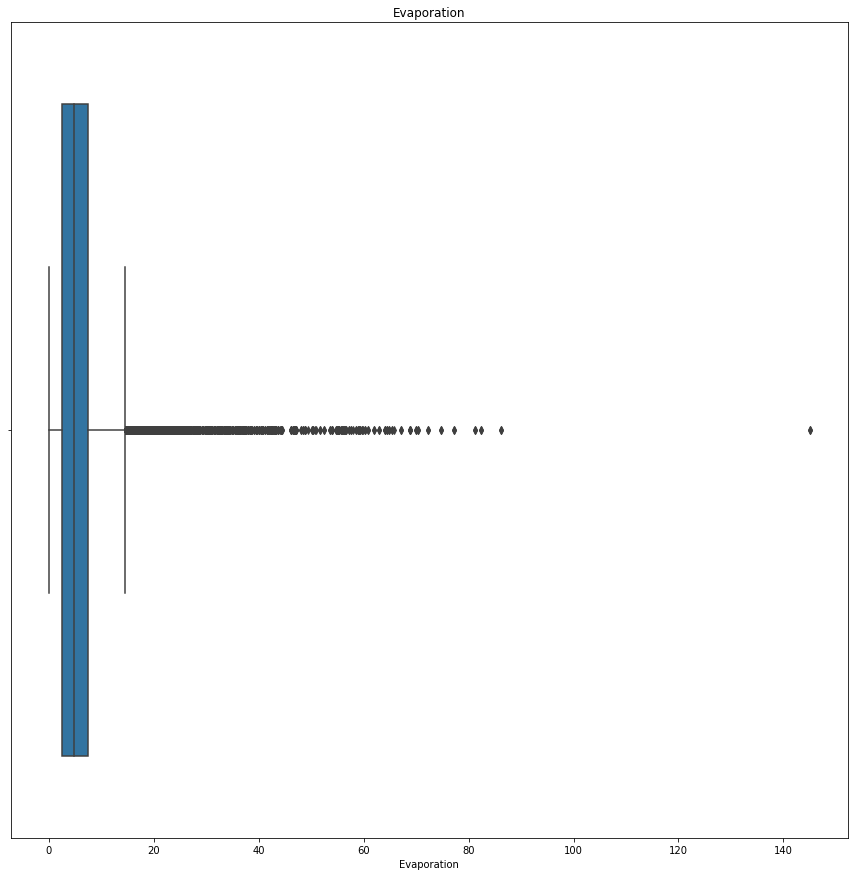

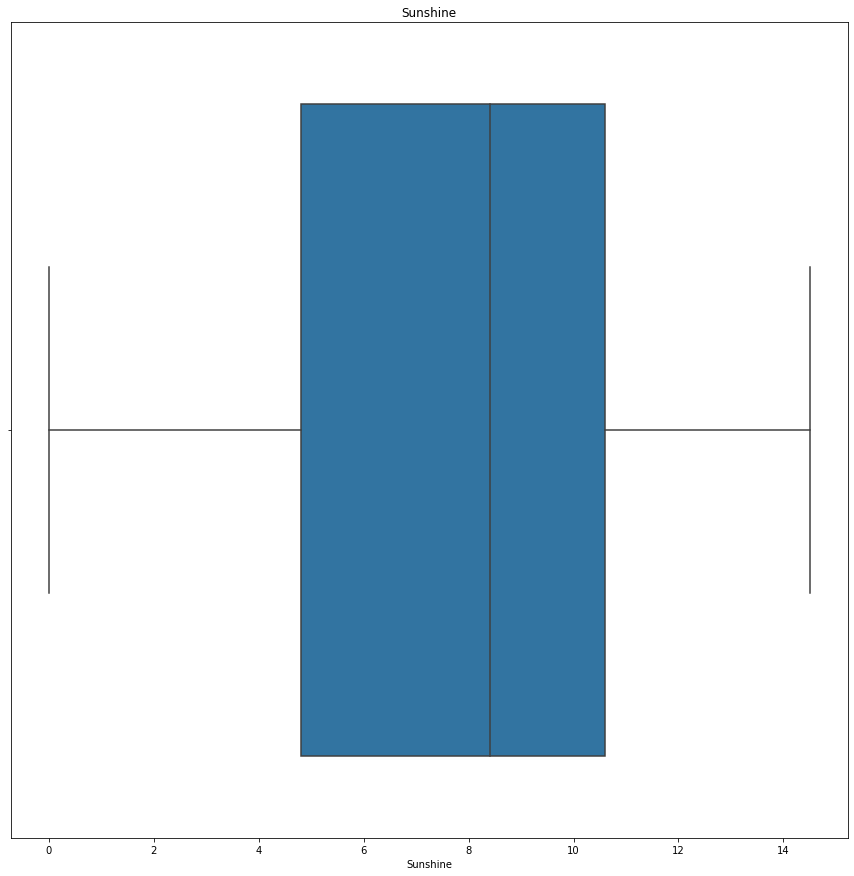

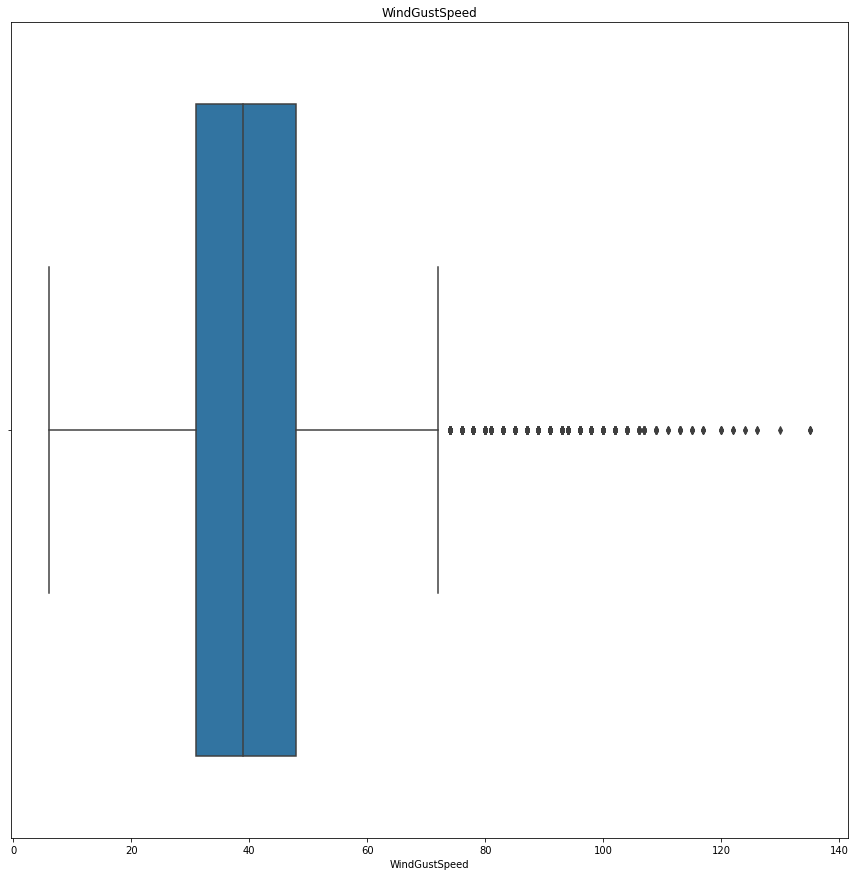

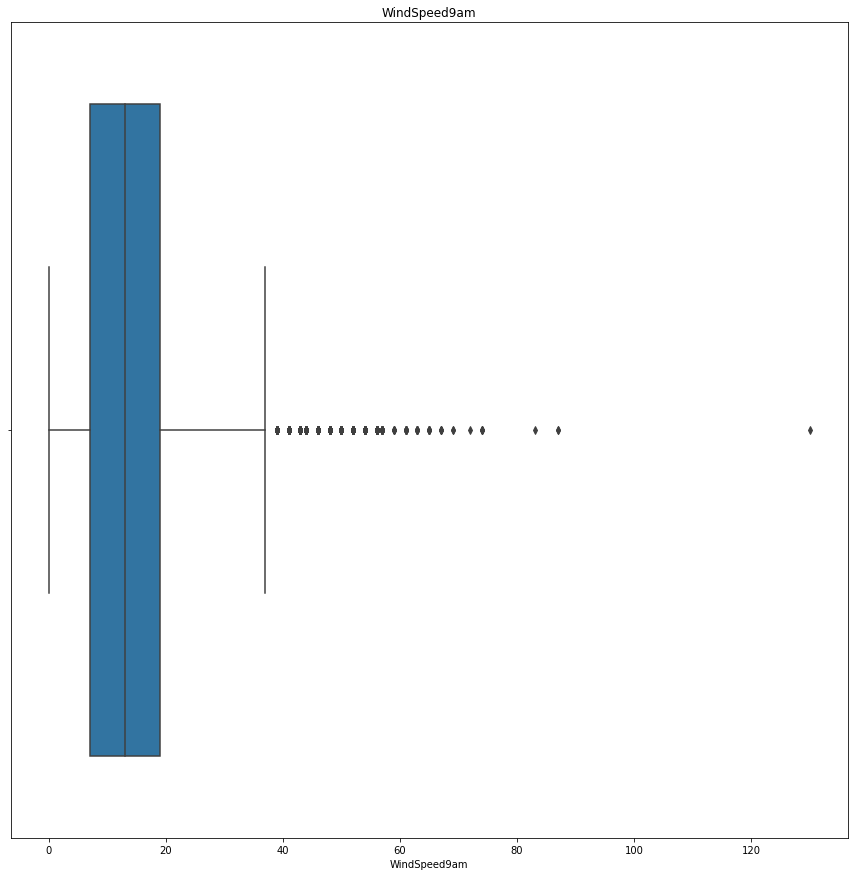

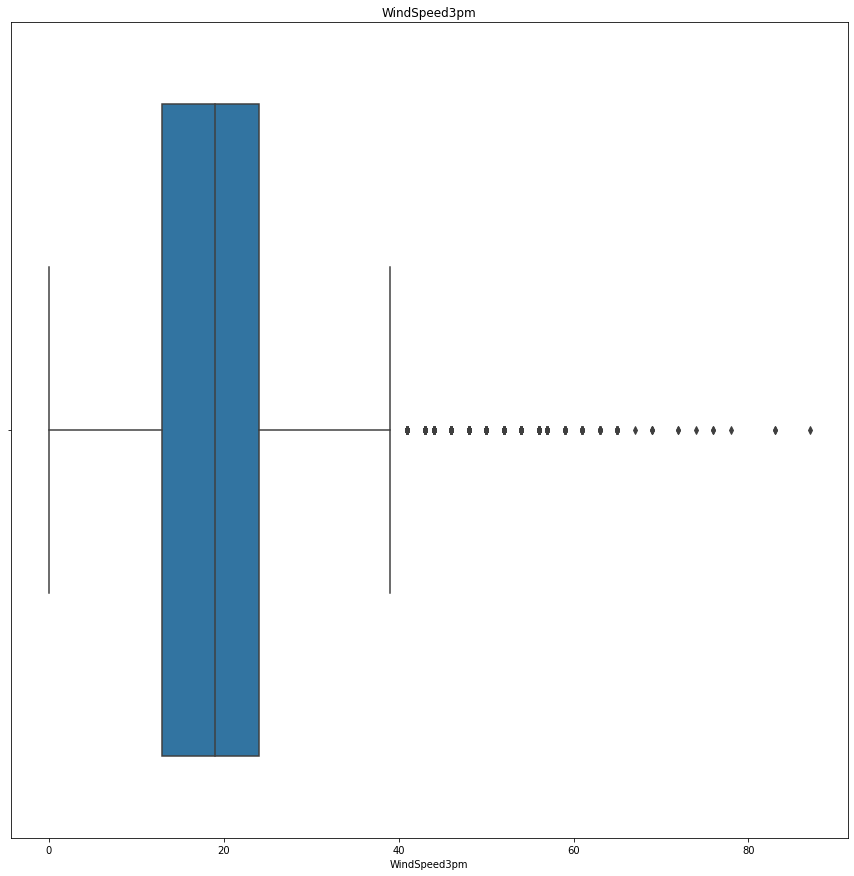

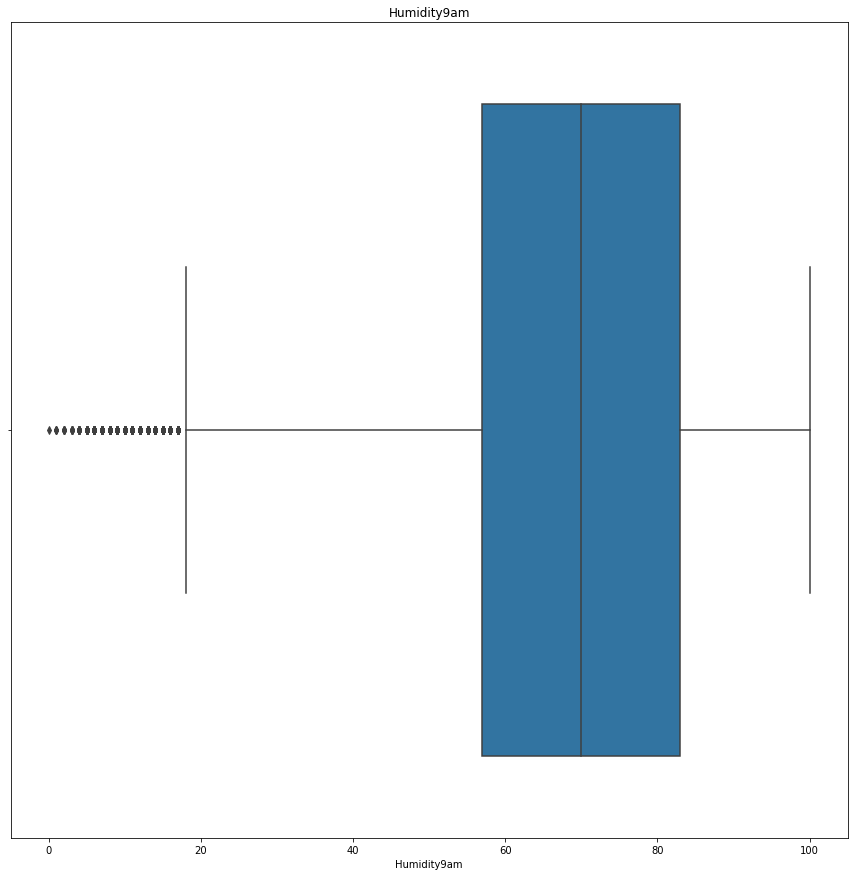

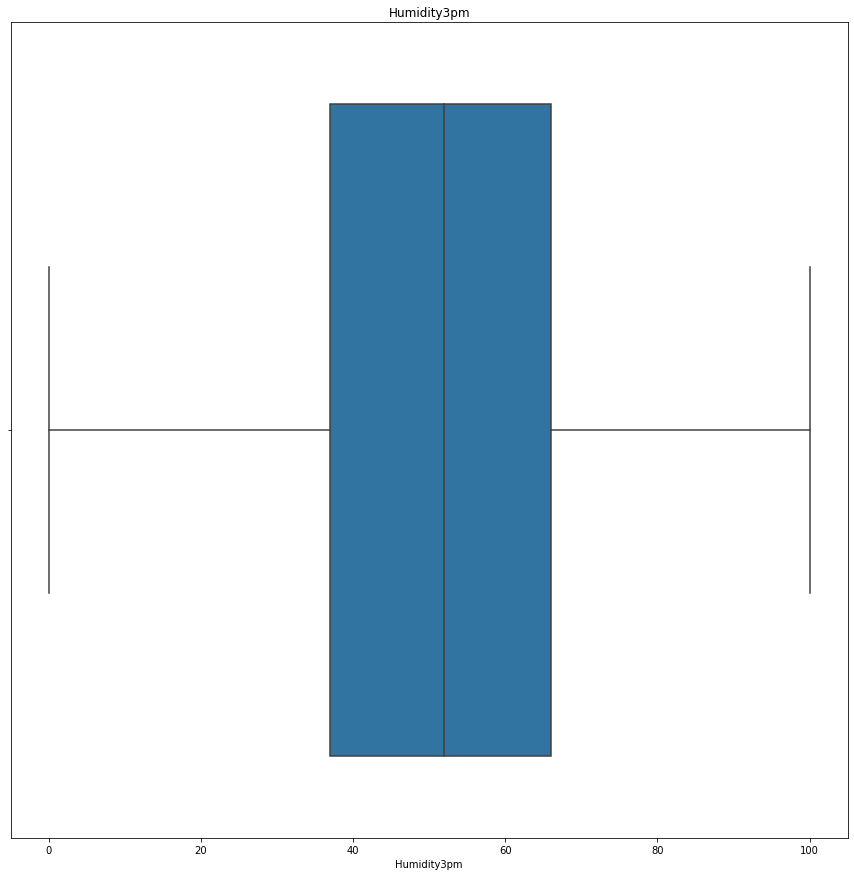

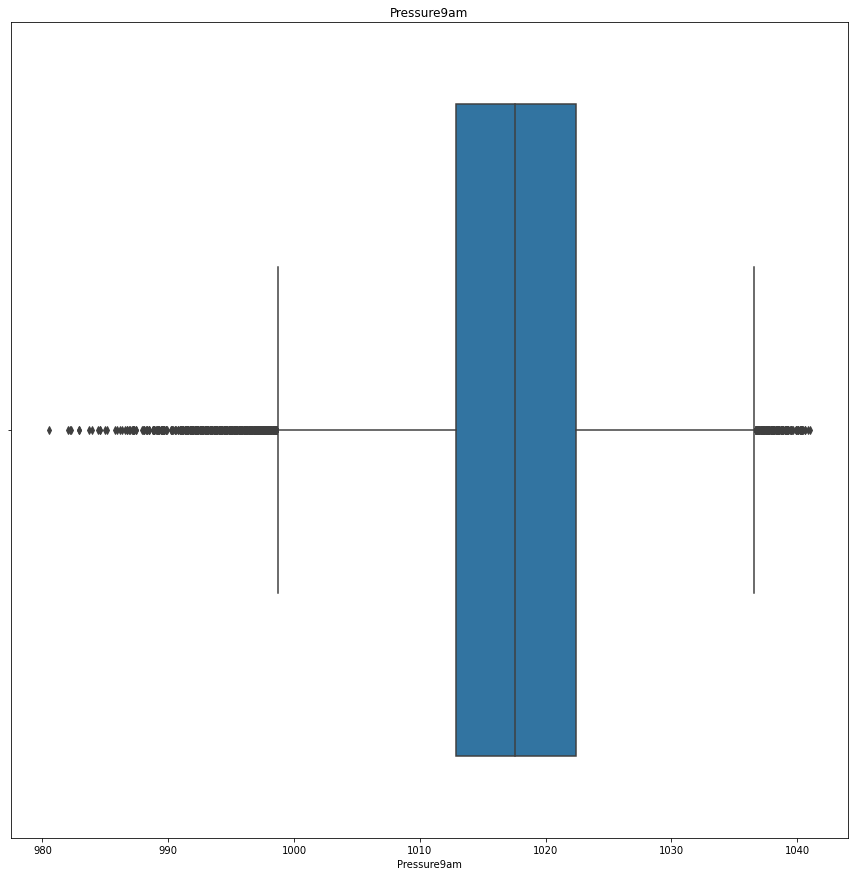

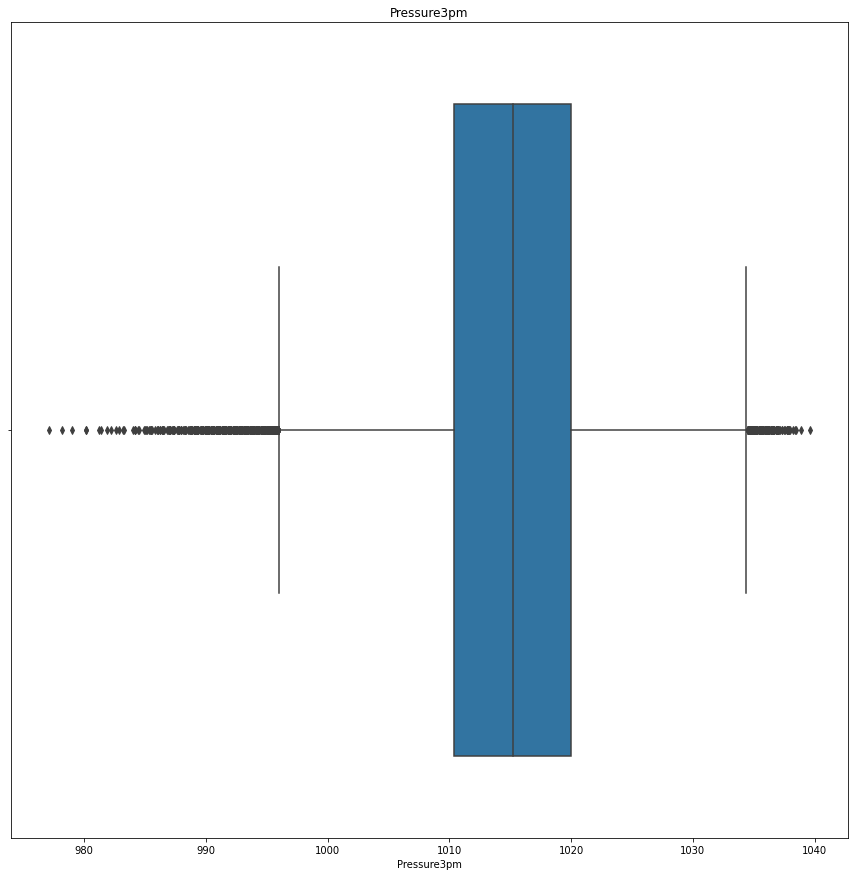

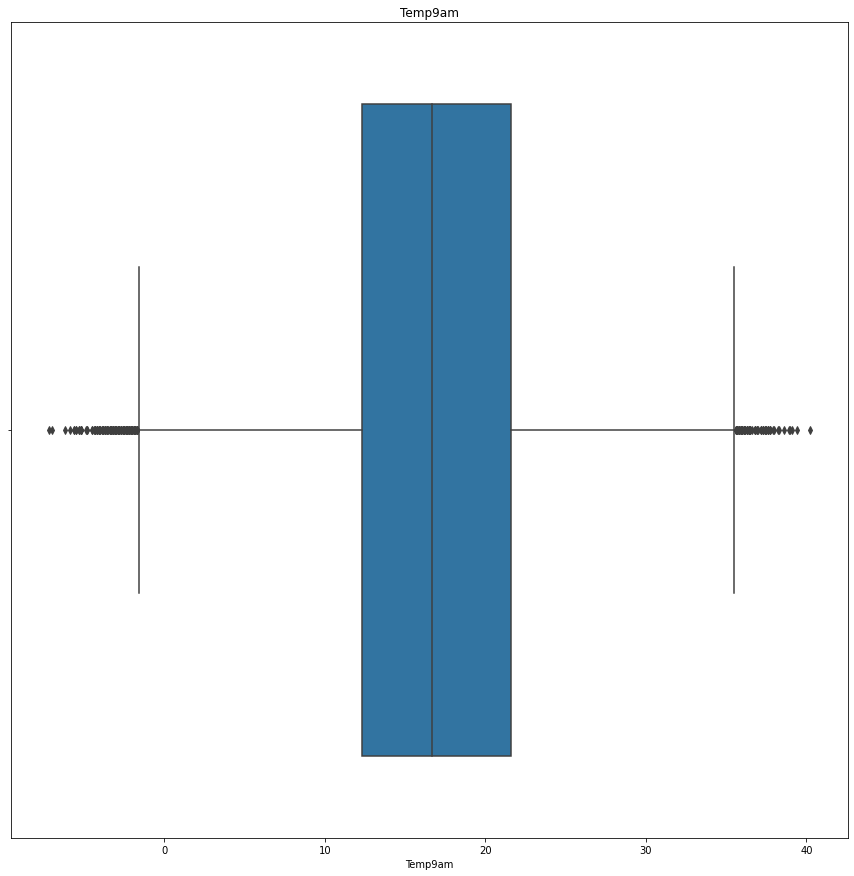

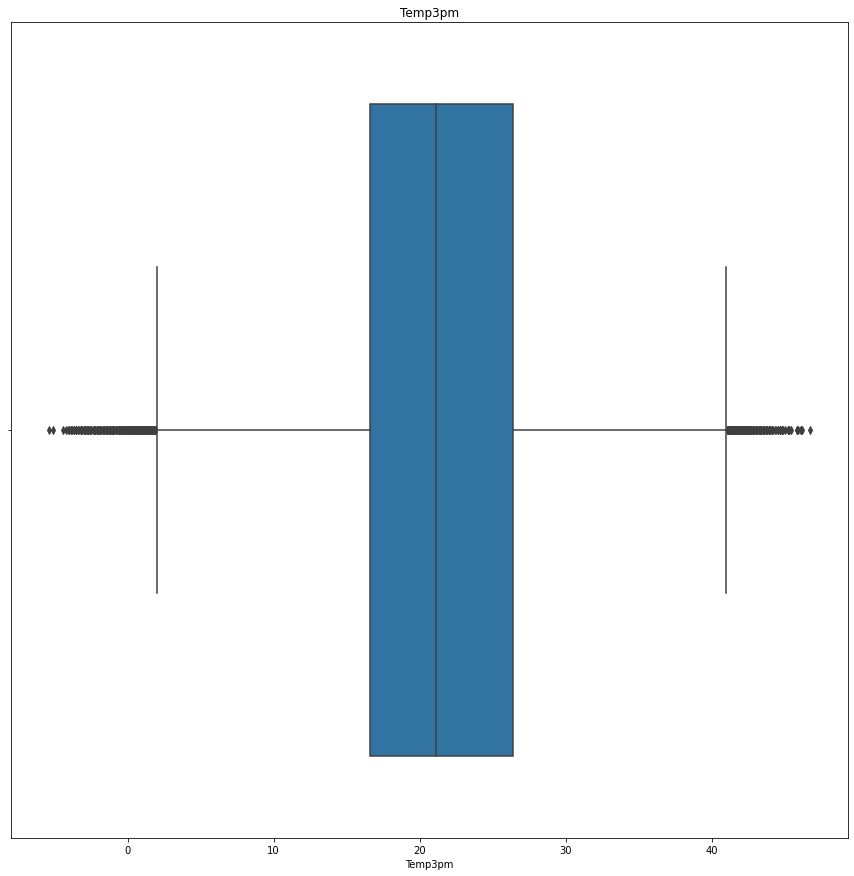

<Figure size 1080x1080 with 0 Axes>

In [13]:
for feature in continue_features:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15, 15))

In [15]:
for feature in continue_features:
    if(df[feature].isnull().sum()*100/len(df)) > 0:
        df[feature] = df[feature].fillna(df[feature].median())

In [16]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.000000
MaxTemp           0.000000
Rainfall          0.000000
Evaporation       0.000000
Sunshine          0.000000
WindGustDir       7.098859
WindGustSpeed     0.000000
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      0.000000
WindSpeed3pm      0.000000
Humidity9am       0.000000
Humidity3pm       0.000000
Pressure9am       0.000000
Pressure3pm       0.000000
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           0.000000
Temp3pm           0.000000
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [17]:
df[discrete_features].isnull().sum()*100/len(df)

Cloud9am    38.421559
Cloud3pm    40.807095
dtype: float64

In [18]:
def handle_discrete_features(df, variable):
    mode = df[variable].value_counts().index[0]
    df[variable].fillna(mode, inplace=True)
handle_discrete_features(df, "Cloud9am")
handle_discrete_features(df, "Cloud3pm")

In [19]:
df[discrete_features].isnull().sum()

Cloud9am    0
Cloud3pm    0
dtype: int64

In [20]:
df["RainToday"] = pd.get_dummies(df["RainToday"], drop_first=True)
df["RainTomorrow"] = pd.get_dummies(df["RainTomorrow"], drop_first=True)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,4.8,8.4,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,0,0
145456,2017-06-22,Uluru,3.6,25.3,0.0,4.8,8.4,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,0,0
145457,2017-06-23,Uluru,5.4,26.9,0.0,4.8,8.4,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,0,0
145458,2017-06-24,Uluru,7.8,27.0,0.0,4.8,8.4,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [21]:
df["RainToday"].value_counts()

0    113580
1     31880
Name: RainToday, dtype: int64

In [22]:
categorical_features

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [23]:
for feature in categorical_features:
    print(feature, (df.groupby([feature])["RainTomorrow"].mean().sort_values(ascending=False)).index)

Date Index(['2007-11-01', '2007-12-15', '2008-02-03', '2008-01-31', '2008-01-30',
       '2008-01-19', '2008-01-18', '2008-01-16', '2008-01-12', '2007-11-30',
       ...
       '2008-05-08', '2008-05-09', '2008-01-03', '2008-01-02', '2008-05-10',
       '2008-05-11', '2008-05-12', '2008-05-13', '2008-05-14', '2007-12-25'],
      dtype='object', name='Date', length=3436)
Location Index(['Portland', 'Walpole', 'Cairns', 'Dartmoor', 'NorfolkIsland',
       'MountGambier', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'MountGinini',
       'NorahHead', 'Darwin', 'Sydney', 'SydneyAirport', 'Ballarat',
       'GoldCoast', 'Watsonia', 'Newcastle', 'Hobart', 'Wollongong',
       'Williamtown', 'Launceston', 'Brisbane', 'MelbourneAirport', 'Adelaide',
       'Sale', 'Albury', 'Perth', 'Melbourne', 'Nuriootpa', 'Penrith',
       'BadgerysCreek', 'PerthAirport', 'Tuggeranong', 'Richmond', 'Bendigo',
       'Canberra', 'WaggaWagga', 'Townsville', 'Katherine', 'PearceRAAF',
       'SalmonGums', 'Nhil', 

In [24]:
## Based on above descending order of rainfallTomorrow count

windGustDirList = list(df.groupby(["WindGustDir"])["RainTomorrow"].mean().sort_values(ascending=False).index)
windDir9amList = list(df.groupby(["WindDir9am"])["RainTomorrow"].mean().sort_values(ascending=False).index)
windDir3pmList = list(df.groupby(["WindDir3pm"])["RainTomorrow"].mean().sort_values(ascending=False).index)


print(windGustDirList)
print(windDir9amList)
print(windDir3pmList)

['NNW', 'NW', 'WNW', 'N', 'W', 'WSW', 'NNE', 'S', 'SSW', 'SW', 'SSE', 'NE', 'SE', 'ESE', 'ENE', 'E']
['NNW', 'N', 'NW', 'NNE', 'WNW', 'W', 'WSW', 'SW', 'SSW', 'NE', 'S', 'SSE', 'ENE', 'SE', 'ESE', 'E']
['NW', 'NNW', 'N', 'WNW', 'W', 'NNE', 'WSW', 'SSW', 'S', 'SW', 'SE', 'NE', 'SSE', 'ENE', 'E', 'ESE']


In [25]:
def rank_feature(df, featureList):
    rank_dic = {}
    rank = 0
    for val in featureList:
        rank_dic[val] = rank
        rank += 1
    return rank_dic
    

windGustDir = rank_feature(df, windGustDirList)
windDir9am = rank_feature(df, windDir9amList)
windDir3pm = rank_feature(df, windDir3pmList)

windGustDir


{'NNW': 0,
 'NW': 1,
 'WNW': 2,
 'N': 3,
 'W': 4,
 'WSW': 5,
 'NNE': 6,
 'S': 7,
 'SSW': 8,
 'SW': 9,
 'SSE': 10,
 'NE': 11,
 'SE': 12,
 'ESE': 13,
 'ENE': 14,
 'E': 15}

In [26]:
df["WindGustDir"] = df["WindGustDir"].map(windGustDir)
df["WindDir9am"] = df["WindDir9am"].map(windDir9am)
df["WindDir3pm"] = df["WindDir3pm"].map(windDir3pm)

In [27]:
df["WindGustDir"].value_counts()

4.0     9915
12.0    9418
3.0     9313
10.0    9216
15.0    9181
7.0     9168
5.0     9069
9.0     8967
8.0     8736
2.0     8252
1.0     8122
14.0    8104
13.0    7372
11.0    7133
0.0     6620
6.0     6548
Name: WindGustDir, dtype: int64

In [28]:
## handle missing values for these

df["WindGustDir"] = df["WindGustDir"].fillna(df["WindGustDir"].value_counts().index[0])
df["WindDir9am"] = df["WindDir9am"].fillna(df["WindDir9am"].value_counts().index[0])
df["WindDir3pm"] = df["WindDir3pm"].fillna(df["WindDir3pm"].value_counts().index[0])

In [29]:
df.isnull().sum()*100/len(df)

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

In [30]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [31]:
df_locations = df.groupby(["Location"])["RainTomorrow"].value_counts().sort_values().unstack()
df_locations

RainTomorrow,0,1
Location,,
Adelaide,2505,688
Albany,2138,902
Albury,2422,618
AliceSprings,2796,244
BadgerysCreek,2426,583
Ballarat,2259,781
Bendigo,2478,562
Brisbane,2484,709
Cairns,2090,950


In [32]:
df_locations[1].sort_values(ascending=False)

Location
Portland            1095
Cairns               950
Walpole              949
Dartmoor             922
MountGambier         920
NorfolkIsland        919
Albany               902
Witchcliffe          879
CoffsHarbour         869
Sydney               865
Darwin               852
MountGinini          819
NorahHead            808
Ballarat             781
GoldCoast            775
SydneyAirport        774
Hobart               761
Watsonia             738
Newcastle            731
Wollongong           713
Brisbane             709
Williamtown          700
Launceston           699
Adelaide             688
MelbourneAirport     653
Perth                645
Sale                 643
Melbourne            636
Canberra             629
Albury               618
Penrith              595
Nuriootpa            592
BadgerysCreek        583
Tuggeranong          568
PerthAirport         567
Bendigo              562
Richmond             560
WaggaWagga           536
Townsville           519
PearceRAAF      

In [33]:
sorted_locations = df_locations[1].sort_values(ascending=False).index
sorted_locations

Index(['Portland', 'Cairns', 'Walpole', 'Dartmoor', 'MountGambier',
       'NorfolkIsland', 'Albany', 'Witchcliffe', 'CoffsHarbour', 'Sydney',
       'Darwin', 'MountGinini', 'NorahHead', 'Ballarat', 'GoldCoast',
       'SydneyAirport', 'Hobart', 'Watsonia', 'Newcastle', 'Wollongong',
       'Brisbane', 'Williamtown', 'Launceston', 'Adelaide', 'MelbourneAirport',
       'Perth', 'Sale', 'Melbourne', 'Canberra', 'Albury', 'Penrith',
       'Nuriootpa', 'BadgerysCreek', 'Tuggeranong', 'PerthAirport', 'Bendigo',
       'Richmond', 'WaggaWagga', 'Townsville', 'PearceRAAF', 'SalmonGums',
       'Moree', 'Cobar', 'Mildura', 'Katherine', 'AliceSprings', 'Nhil',
       'Woomera', 'Uluru'],
      dtype='object', name='Location')

In [33]:
len(sorted_locations)

49

In [34]:
def create_location_map(locations):
    loc_map = {}
    rank = 1
    for loc in locations:
        loc_map[loc] = rank
        rank += 1
    return loc_map
locations_map = create_location_map(sorted_locations)
locations_map

{'Portland': 1,
 'Cairns': 2,
 'Walpole': 3,
 'Dartmoor': 4,
 'MountGambier': 5,
 'NorfolkIsland': 6,
 'Albany': 7,
 'Witchcliffe': 8,
 'CoffsHarbour': 9,
 'Sydney': 10,
 'Darwin': 11,
 'MountGinini': 12,
 'NorahHead': 13,
 'Ballarat': 14,
 'GoldCoast': 15,
 'SydneyAirport': 16,
 'Hobart': 17,
 'Watsonia': 18,
 'Newcastle': 19,
 'Wollongong': 20,
 'Brisbane': 21,
 'Williamtown': 22,
 'Launceston': 23,
 'Adelaide': 24,
 'MelbourneAirport': 25,
 'Perth': 26,
 'Sale': 27,
 'Melbourne': 28,
 'Canberra': 29,
 'Albury': 30,
 'Penrith': 31,
 'Nuriootpa': 32,
 'BadgerysCreek': 33,
 'Tuggeranong': 34,
 'PerthAirport': 35,
 'Bendigo': 36,
 'Richmond': 37,
 'WaggaWagga': 38,
 'Townsville': 39,
 'PearceRAAF': 40,
 'SalmonGums': 41,
 'Moree': 42,
 'Cobar': 43,
 'Mildura': 44,
 'Katherine': 45,
 'AliceSprings': 46,
 'Nhil': 47,
 'Woomera': 48,
 'Uluru': 49}

In [35]:
df["Location"] = df["Location"].map(locations_map)

In [36]:
df["Date"].head()

0    2008-12-01
1    2008-12-02
2    2008-12-03
3    2008-12-04
4    2008-12-05
Name: Date, dtype: object

In [37]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%dT", errors="coerce")


In [38]:
df["Date"]

0        2008-12-01
1        2008-12-02
2        2008-12-03
3        2008-12-04
4        2008-12-05
            ...    
145455   2017-06-21
145456   2017-06-22
145457   2017-06-23
145458   2017-06-24
145459   2017-06-25
Name: Date, Length: 145460, dtype: datetime64[ns]

In [39]:
df["Date_month"] = df["Date"].dt.month
df["Date_day"] = df["Date"].dt.day
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_month,Date_day
0,2008-12-01,30,13.4,22.9,0.6,2.4,8.3,4.0,44.0,5.0,3.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0,12,1
1,2008-12-02,30,7.4,25.1,0.0,3.6,10.0,2.0,44.0,0.0,6.0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0,12,2
2,2008-12-03,30,12.9,25.7,0.0,2.6,4.4,5.0,46.0,5.0,6.0,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0,12,3
3,2008-12-04,30,9.2,28.0,0.0,18.4,8.9,11.0,24.0,13.0,14.0,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0,12,4
4,2008-12-05,30,17.5,32.3,1.0,5.4,3.0,4.0,41.0,12.0,0.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0,12,5


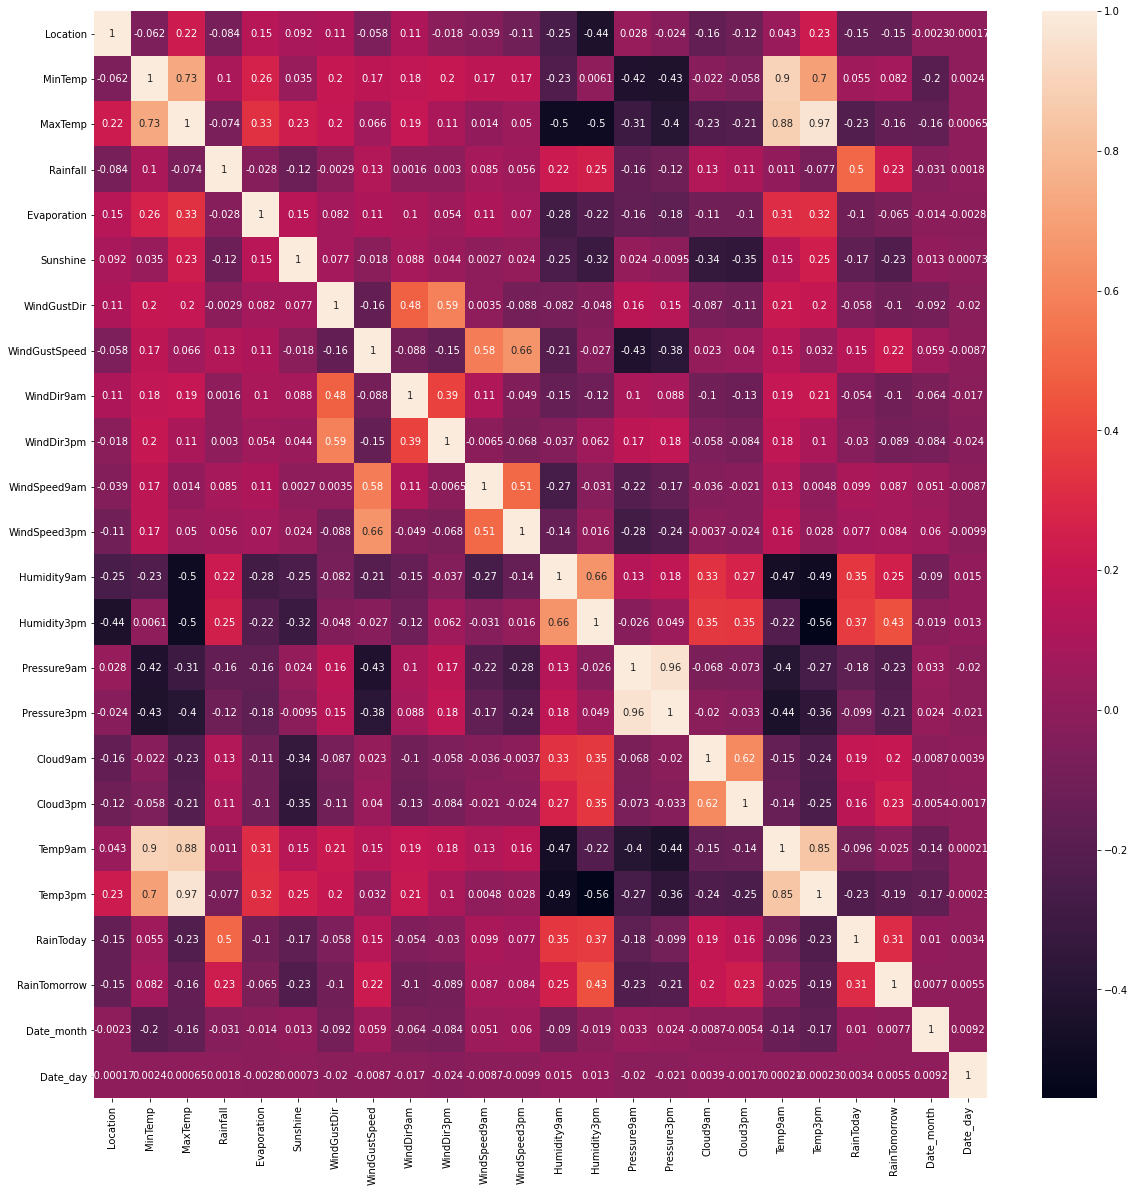

In [40]:
## All features converted to numerical, now check correlation again
correlation_matrix = df.corr()
plt.figure(figsize=(20, 20))
g = sns.heatmap(correlation_matrix, annot=True)

In [41]:
continue_features

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [42]:
## Handle outliers

def replace_with_bridges(dframe, feature):
    IQR = dframe[feature].quantile(0.75) - dframe[feature].quantile(0.25)
    lower_bridge = dframe[feature].quantile(0.25) - (IQR * 1.5)
    upper_bridge = dframe[feature].quantile(0.75) + (IQR * 1.5)

    dframe.loc[dframe[feature] <= lower_bridge, feature] = lower_bridge
    dframe.loc[dframe[feature] >= upper_bridge, feature] = upper_bridge

In [43]:
replace_with_bridges(df, 'MinTemp')
replace_with_bridges(df, 'MaxTemp')
replace_with_bridges(df, 'Rainfall')
replace_with_bridges(df, 'Evaporation')
replace_with_bridges(df, 'WindGustSpeed')
replace_with_bridges(df, 'WindSpeed9am')
replace_with_bridges(df, 'WindSpeed3pm')
replace_with_bridges(df, 'Humidity9am')
replace_with_bridges(df, 'Pressure9am')
replace_with_bridges(df, 'Pressure3pm')
replace_with_bridges(df, 'Temp9am')
replace_with_bridges(df, 'Temp3pm')

c:\Users\ADMIN\anaconda3\envs\rainfall\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ADMIN\anaconda3\envs\rainfall\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\ADMIN\anaconda3\envs\rainfall\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

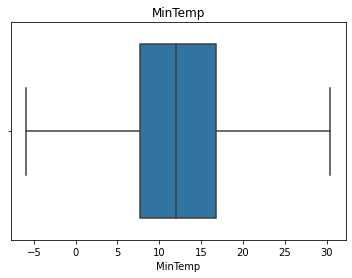

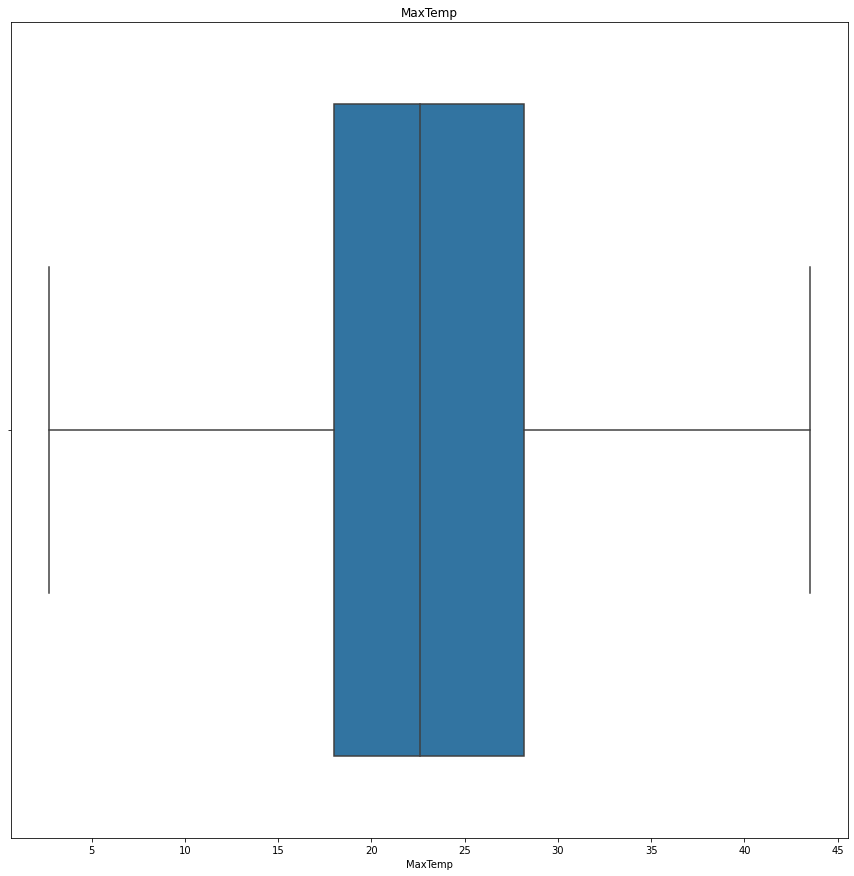

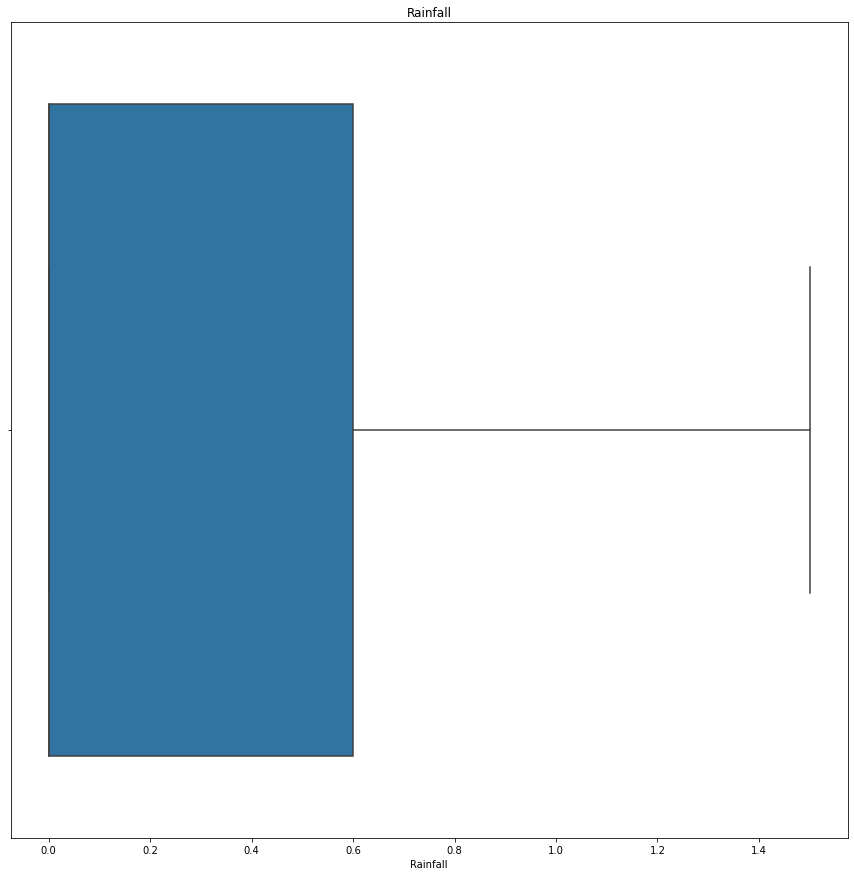

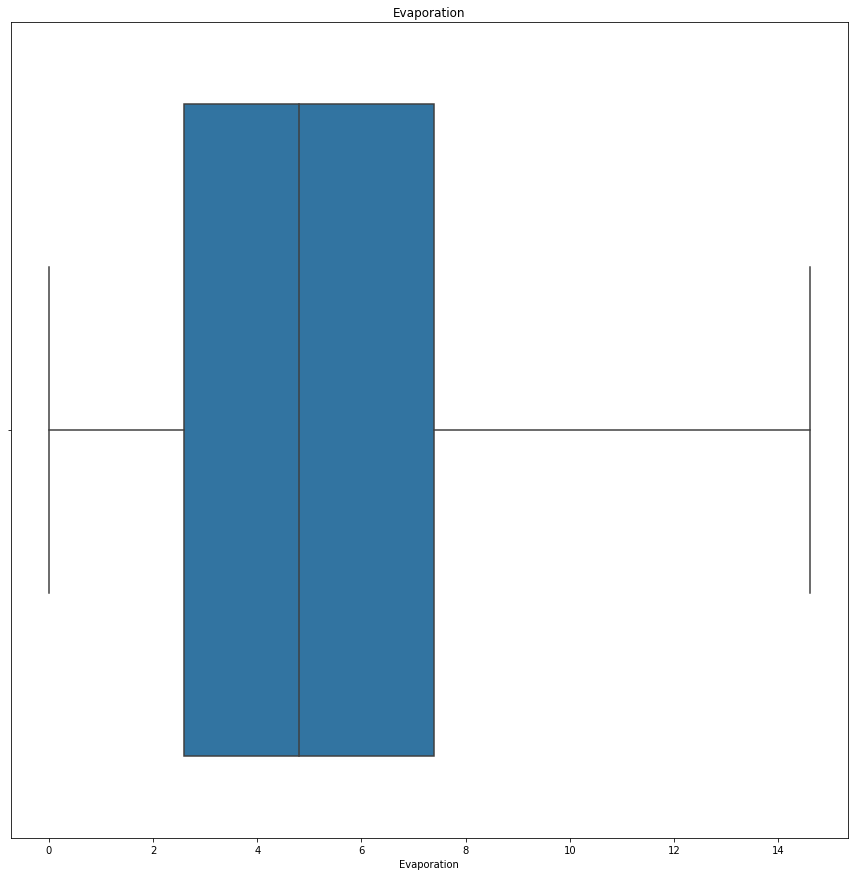

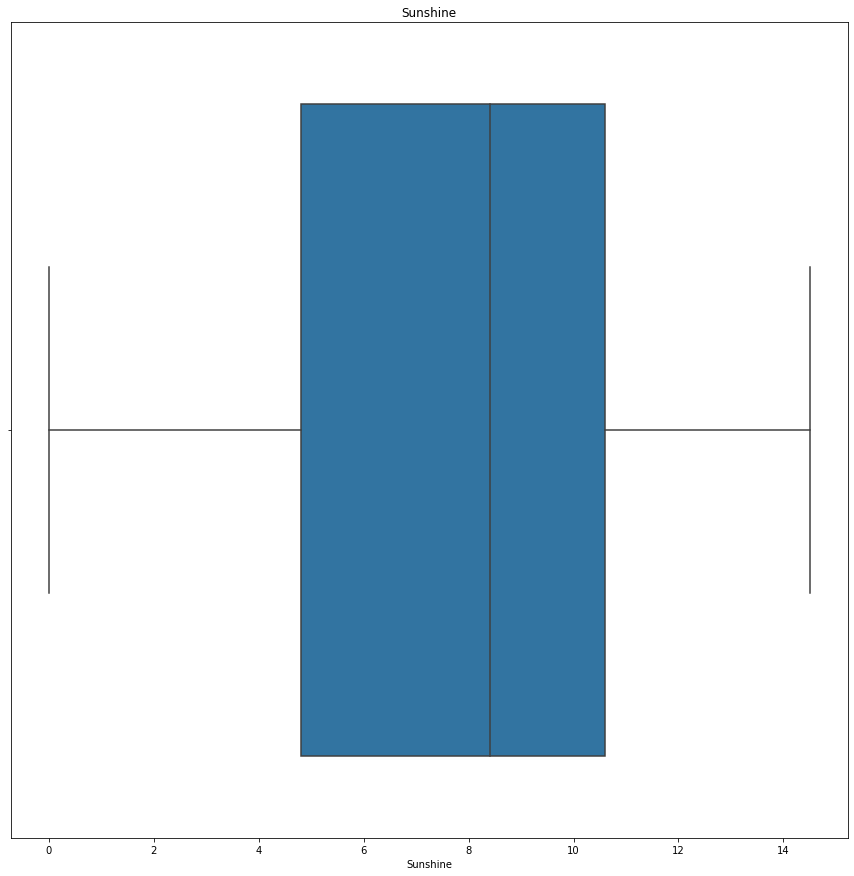

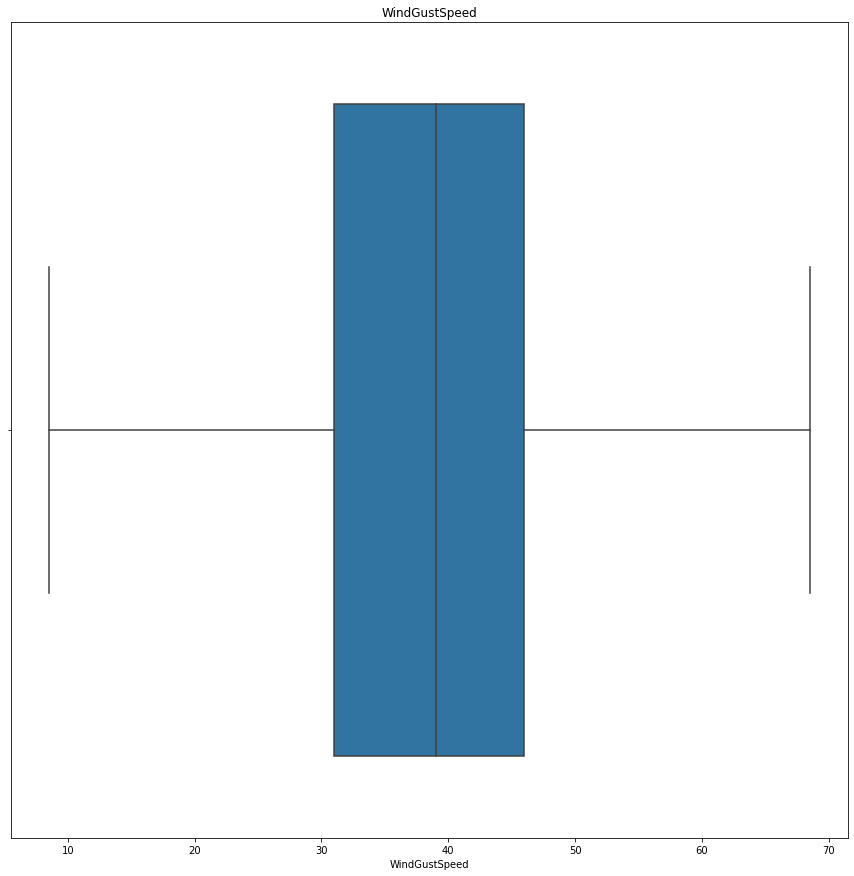

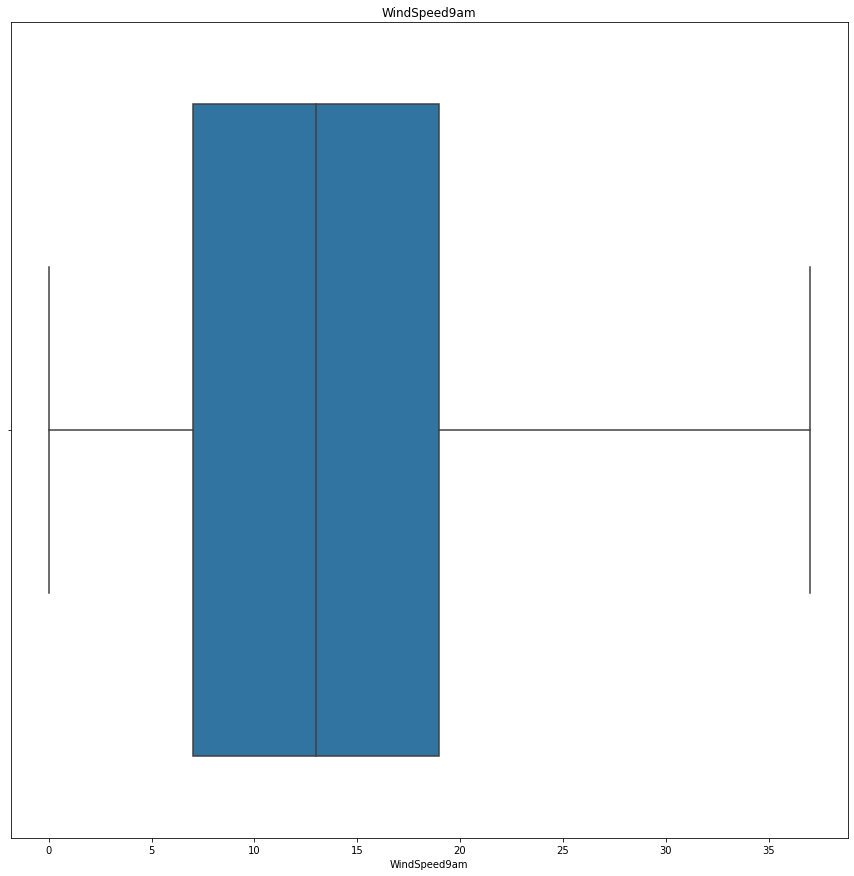

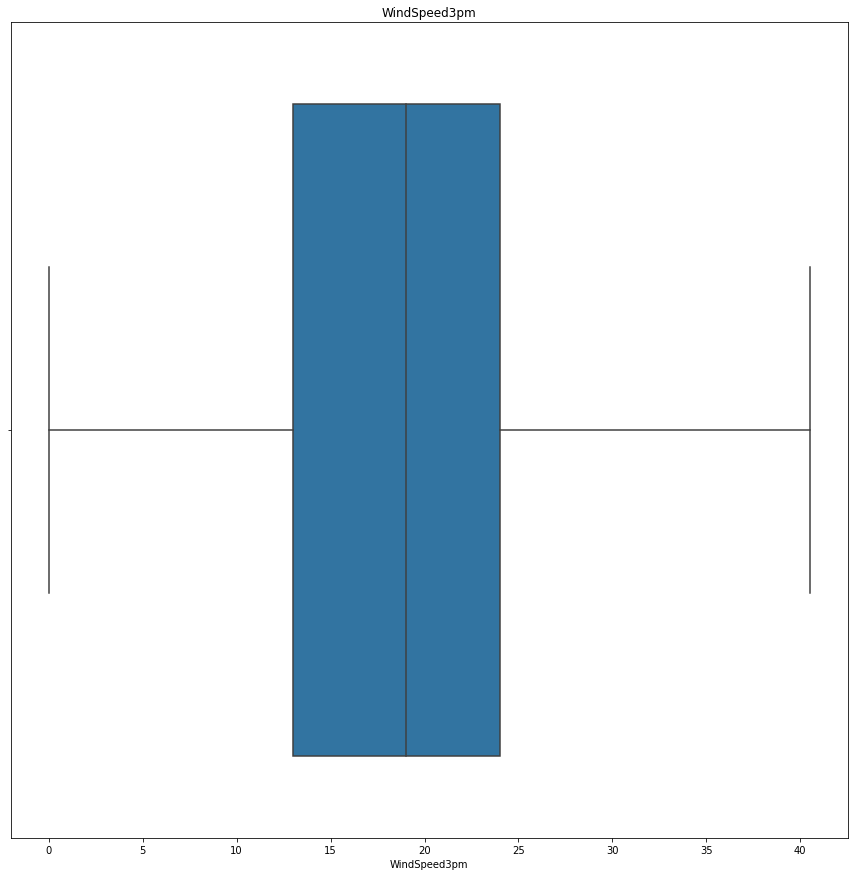

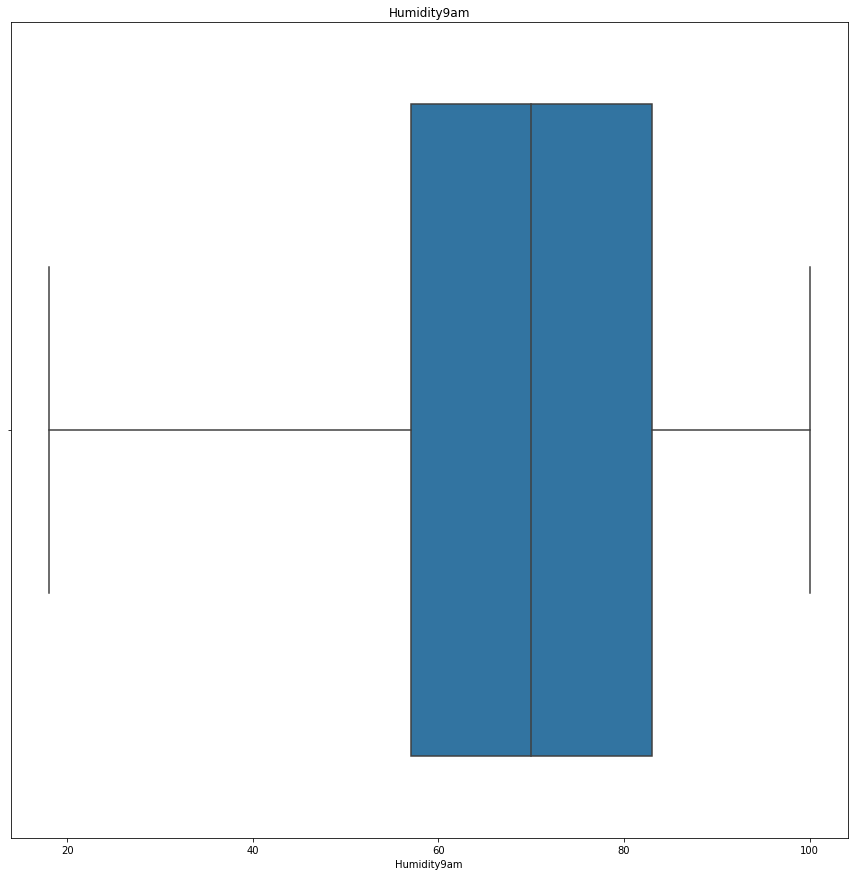

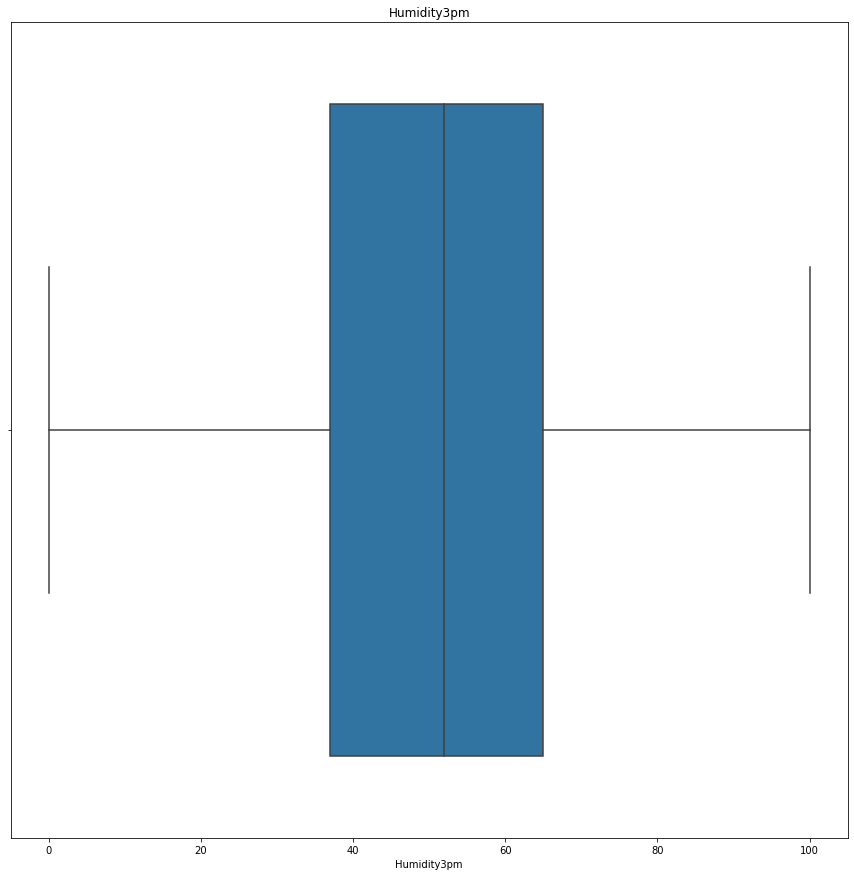

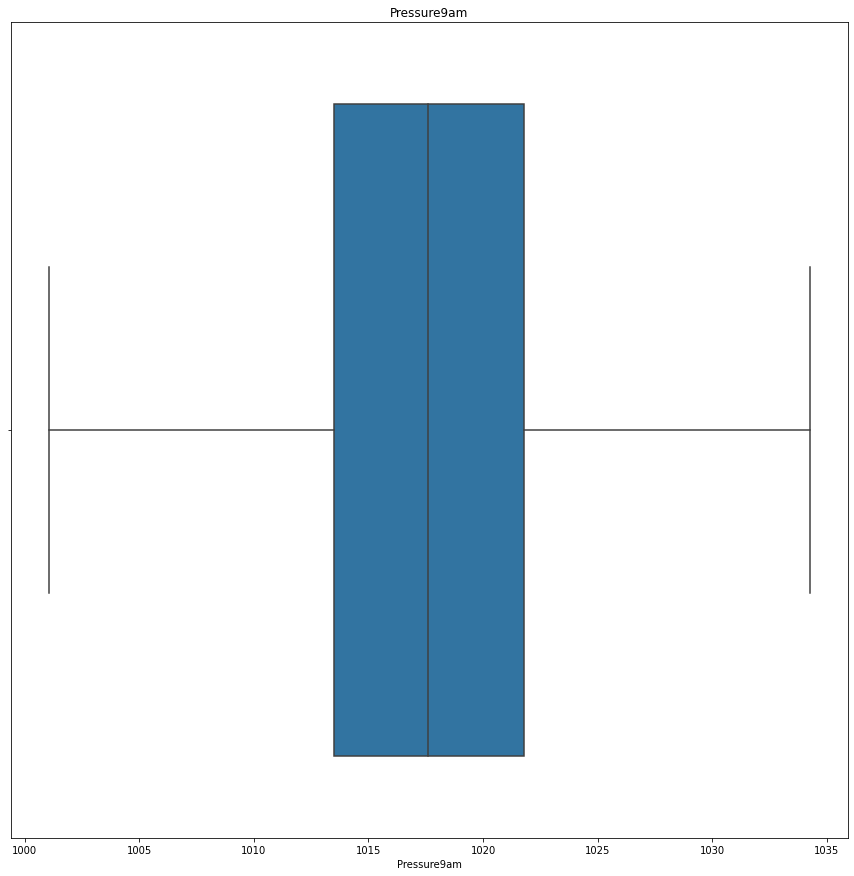

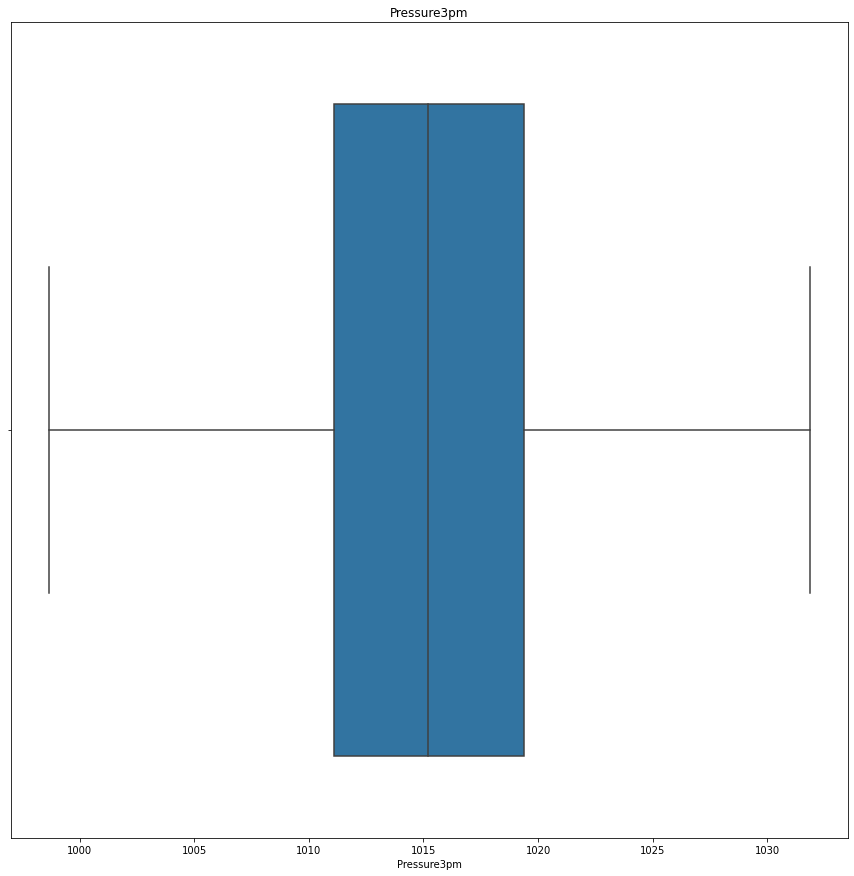

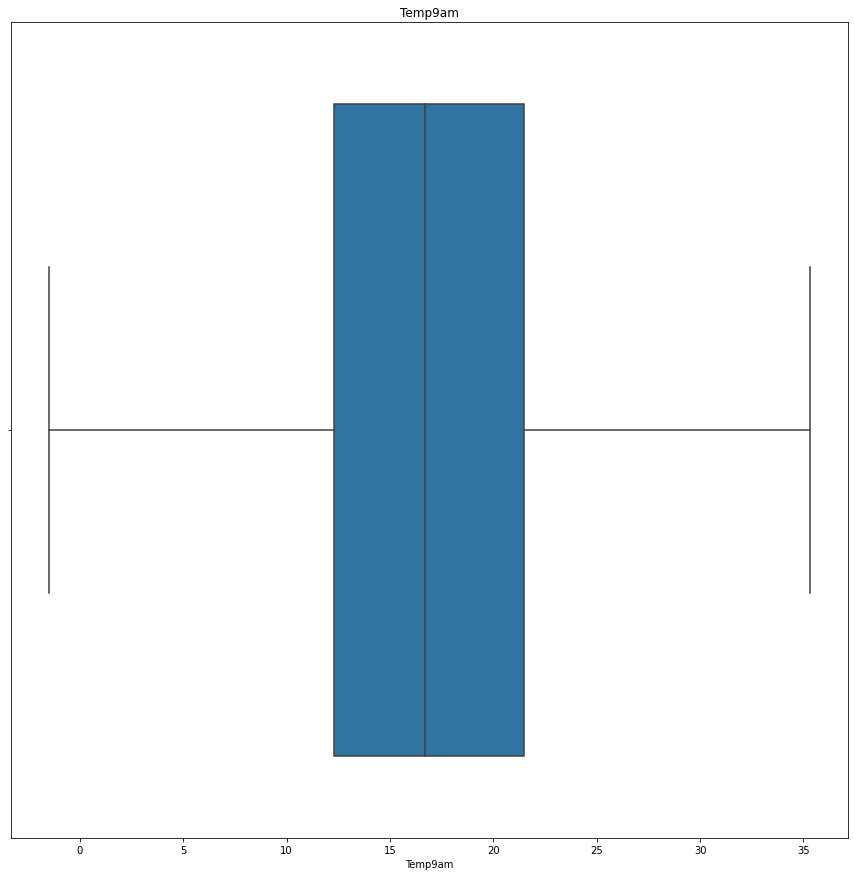

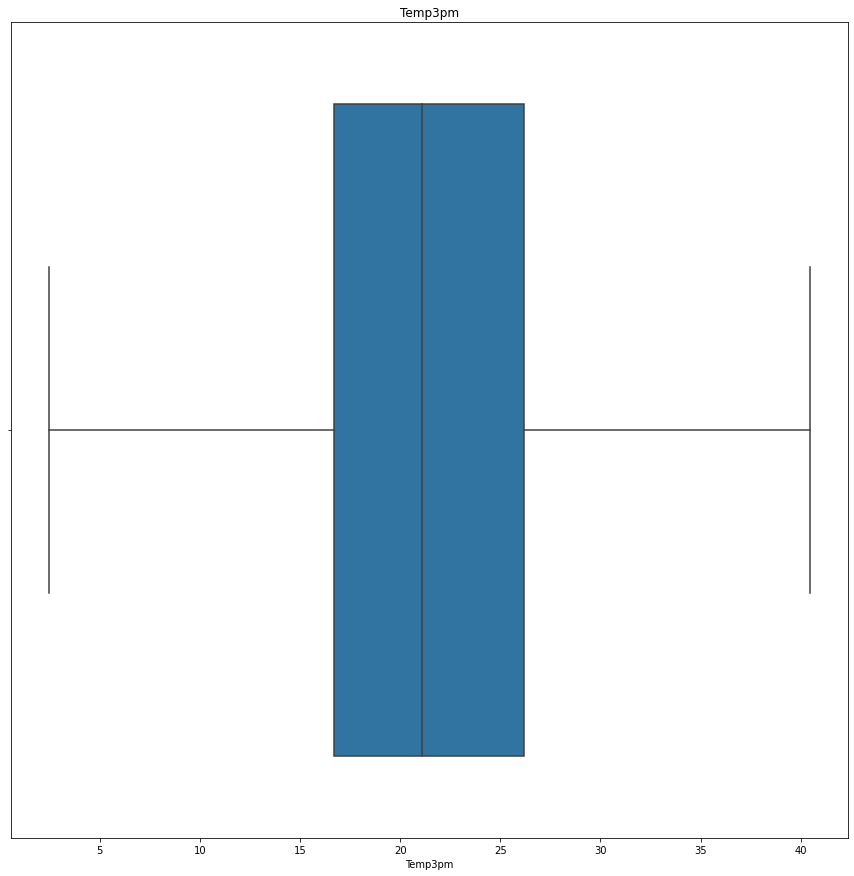

<Figure size 1080x1080 with 0 Axes>

In [44]:
data = df.copy()
for feature in continue_features:
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15, 15))

In [45]:
def qq_plots(df, variable):
    plt.figure(figsize=(15, 6))
    plt.subplot(1, 2, 1)
    df[variable].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()


MinTemp


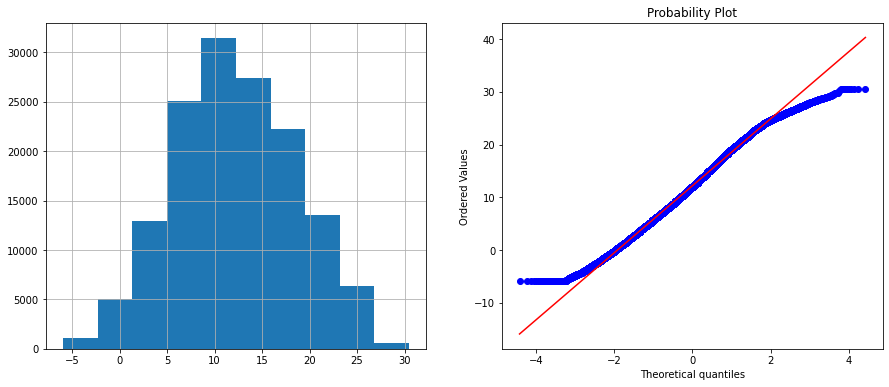

MaxTemp


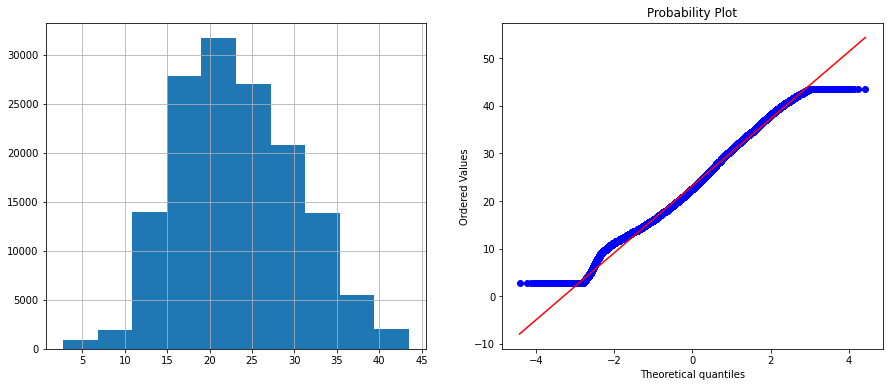

Rainfall


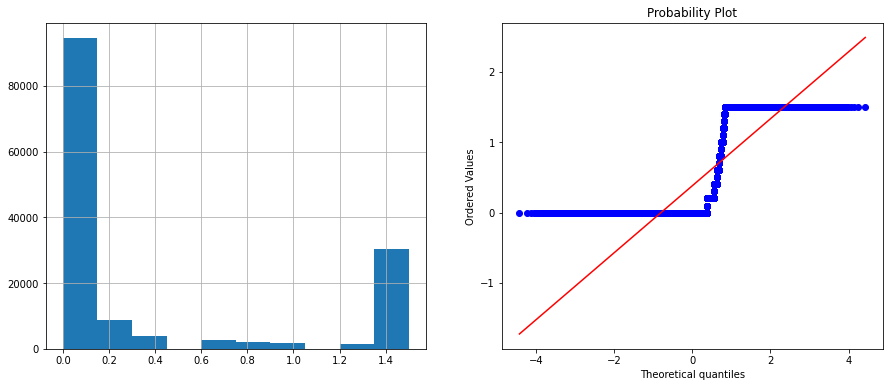

Evaporation


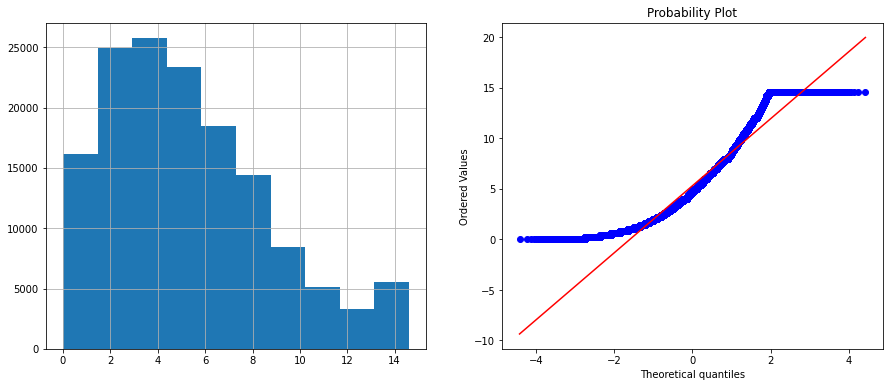

Sunshine


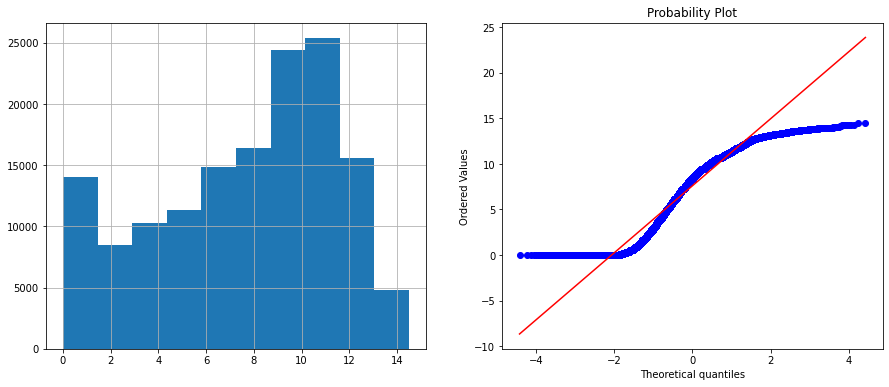

WindGustSpeed


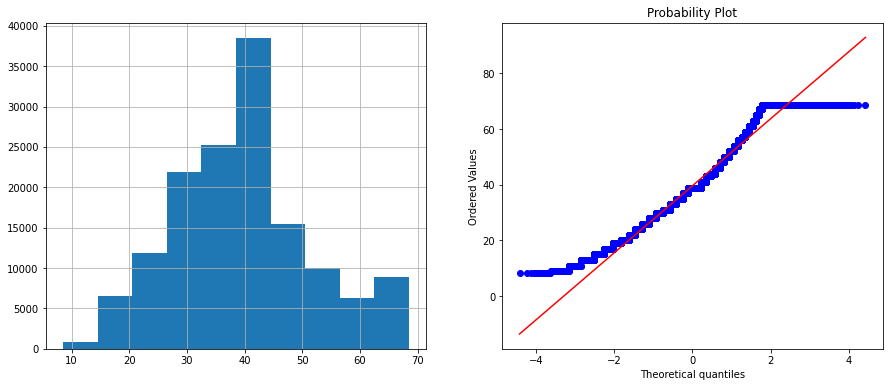

WindSpeed9am


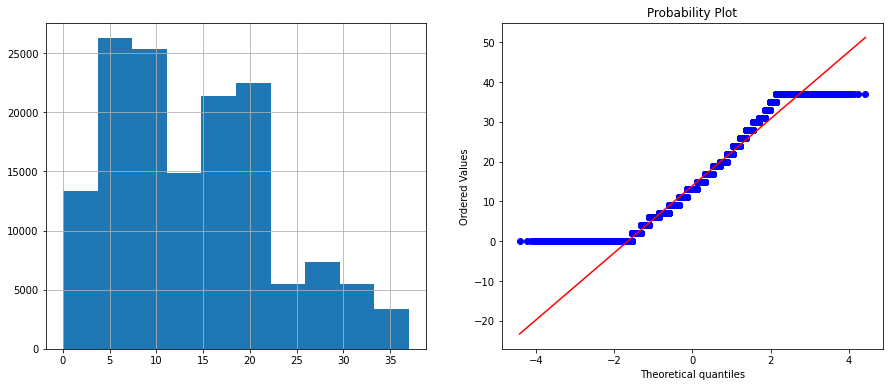

WindSpeed3pm


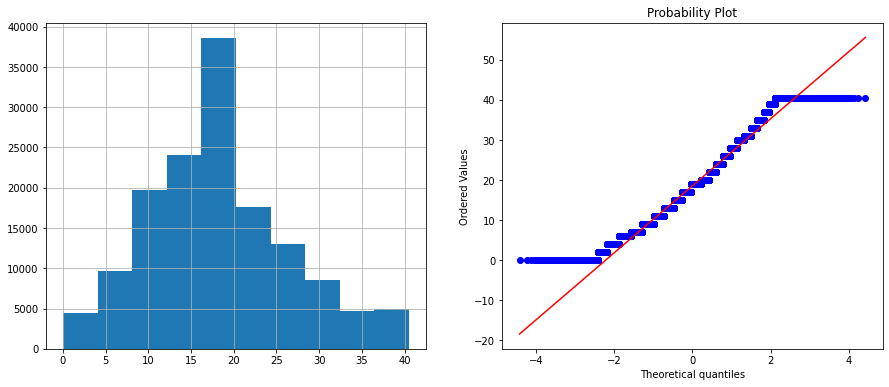

Humidity9am


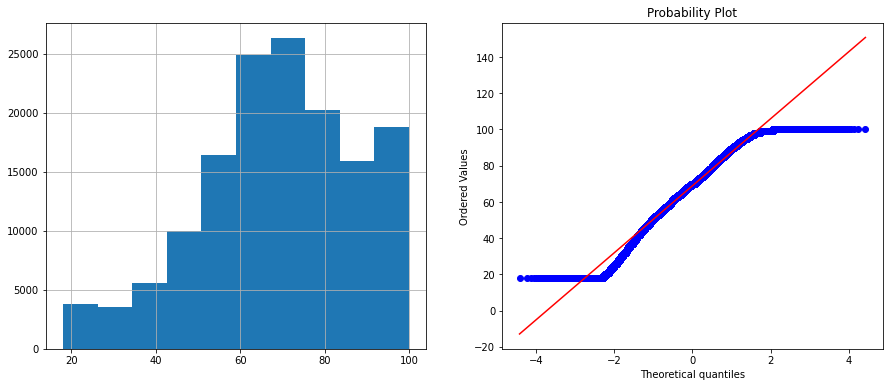

Humidity3pm


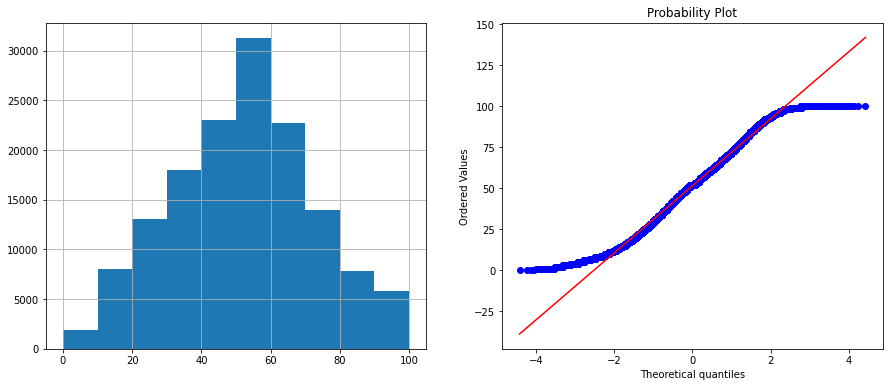

Pressure9am


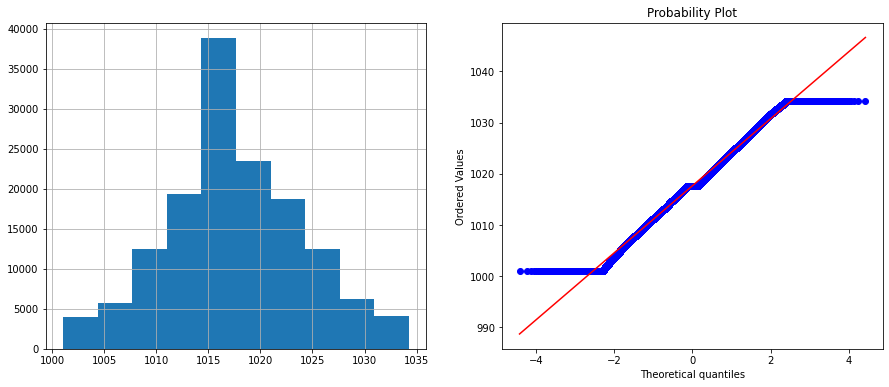

Pressure3pm


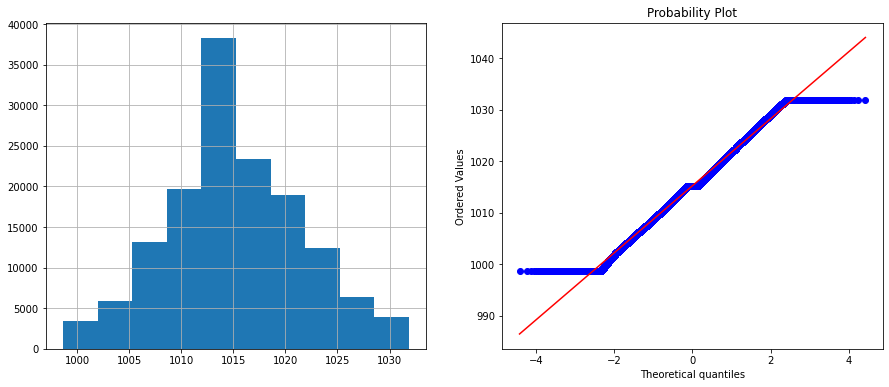

Temp9am


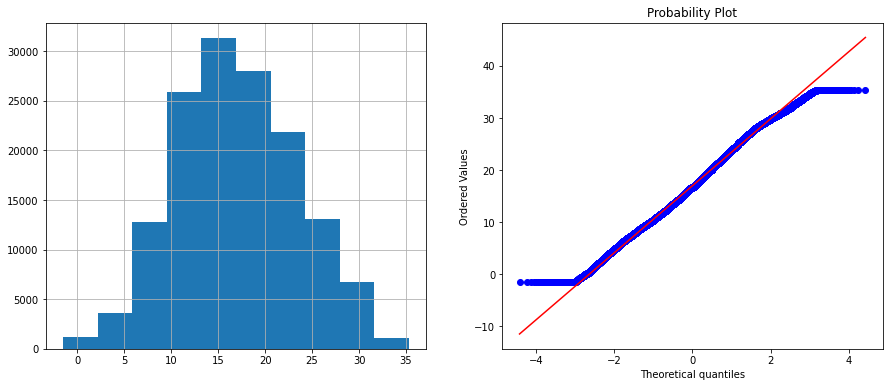

Temp3pm


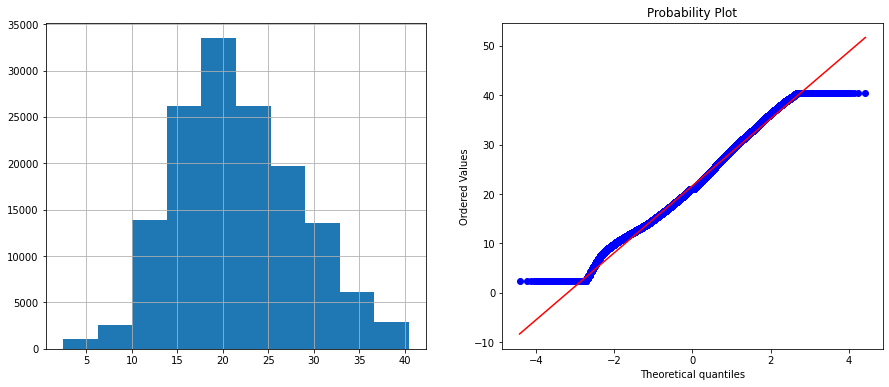

In [46]:
for feature in continue_features:
    print(feature)
    qq_plots(df, feature)


In [55]:
df.to_csv("data/preprocessed_rainfall.csv", index=False)

## Training & Evaluation

In [56]:
X = df.drop(["RainTomorrow", "Date"], axis=1)
Y = df["RainTomorrow"]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=0)

In [58]:
y_train.head()

43447     0
140904    0
54615     0
109793    0
74462     0
Name: RainTomorrow, dtype: uint8

In [60]:
## Performing synthetic minority sampling for balancing the label classes

sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))

The number of classes before fit Counter({0: 90866, 1: 25502})
The number of classes after fit Counter({0: 90866, 1: 90866})


### Model 1: CatBoost Classifier

In [63]:
cat = CatBoostClassifier(iterations=5000, eval_metric="AUC")
cat.fit(X_train_res, y_train_res)

Learning rate set to 0.021715
0:	total: 111ms	remaining: 9m 12s
1:	total: 217ms	remaining: 9m 1s
2:	total: 345ms	remaining: 9m 34s
3:	total: 480ms	remaining: 9m 59s
4:	total: 568ms	remaining: 9m 27s
5:	total: 665ms	remaining: 9m 13s
6:	total: 757ms	remaining: 9m
7:	total: 849ms	remaining: 8m 49s
8:	total: 942ms	remaining: 8m 42s
9:	total: 1.03s	remaining: 8m 35s
10:	total: 1.1s	remaining: 8m 20s
11:	total: 1.17s	remaining: 8m 5s
12:	total: 1.23s	remaining: 7m 51s
13:	total: 1.3s	remaining: 7m 44s
14:	total: 1.37s	remaining: 7m 35s
15:	total: 1.44s	remaining: 7m 29s
16:	total: 1.53s	remaining: 7m 28s
17:	total: 1.61s	remaining: 7m 26s
18:	total: 1.71s	remaining: 7m 28s
19:	total: 1.78s	remaining: 7m 23s
20:	total: 1.86s	remaining: 7m 21s
21:	total: 1.96s	remaining: 7m 23s
22:	total: 2.04s	remaining: 7m 20s
23:	total: 2.11s	remaining: 7m 16s
24:	total: 2.17s	remaining: 7m 11s
25:	total: 2.33s	remaining: 7m 25s
26:	total: 2.4s	remaining: 7m 21s
27:	total: 2.47s	remaining: 7m 18s
28:	total

In [64]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[21477  1240]
 [ 2741  3634]]
0.8631582565653788
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     22717
           1       0.75      0.57      0.65      6375

    accuracy                           0.86     29092
   macro avg       0.82      0.76      0.78     29092
weighted avg       0.86      0.86      0.86     29092



0.7577272717072039

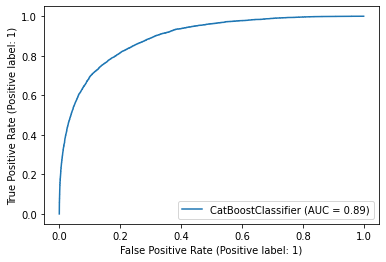

In [65]:
metrics.plot_roc_curve(cat, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None)

### Model 2: Random Forest

In [66]:
rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)

RandomForestClassifier()

In [67]:
y_pred2 = rf.predict(X_test)
print(confusion_matrix(y_test, y_pred2))
print(accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[20656  2061]
 [ 2434  3941]]
0.845490169118658
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     22717
           1       0.66      0.62      0.64      6375

    accuracy                           0.85     29092
   macro avg       0.78      0.76      0.77     29092
weighted avg       0.84      0.85      0.84     29092



0.7637355353639453

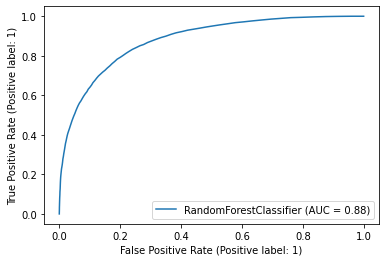

In [68]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None)

### Model 3: Logistic regression

In [69]:
lr = LogisticRegression()
lr.fit(X_train_res, y_train_res)

c:\Users\ADMIN\anaconda3\envs\rainfall\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
y_pred3 = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred3))
print(accuracy_score(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[17533  5184]
 [ 1507  4868]]
0.7700054997937578
              precision    recall  f1-score   support

           0       0.92      0.77      0.84     22717
           1       0.48      0.76      0.59      6375

    accuracy                           0.77     29092
   macro avg       0.70      0.77      0.72     29092
weighted avg       0.83      0.77      0.79     29092



0.7677043485616284

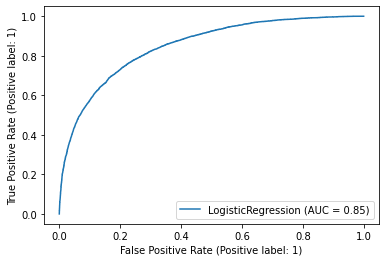

In [71]:
metrics.plot_roc_curve(lr, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None)

### Model 4: Gaussian Naive Bayes Classifier

In [72]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)

GaussianNB()

In [73]:
y_pred4 = gnb.predict(X_test)
print(confusion_matrix(y_test, y_pred4))
print(accuracy_score(y_test, y_pred4))
print(classification_report(y_test, y_pred4))

[[16270  6447]
 [ 1499  4876]]
0.726866492506531
              precision    recall  f1-score   support

           0       0.92      0.72      0.80     22717
           1       0.43      0.76      0.55      6375

    accuracy                           0.73     29092
   macro avg       0.67      0.74      0.68     29092
weighted avg       0.81      0.73      0.75     29092



0.7405332345906624

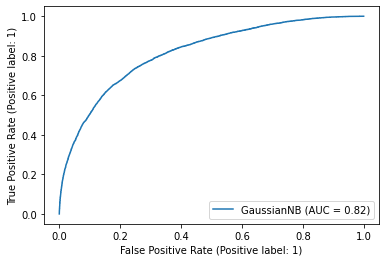

In [74]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred4, average=None)

### Model 5: XGBoost Classification

In [75]:
xgb = XGBClassifier()
xgb.fit(X_train_res, y_train_res)

c:\Users\ADMIN\anaconda3\envs\rainfall\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\ADMIN\anaconda3\envs\rainfall\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[00:36:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
y_pred5 = xgb.predict(X_test)
print(confusion_matrix(y_test, y_pred5))
print(accuracy_score(y_test, y_pred5))
print(classification_report(y_test, y_pred5))

[[21368  1349]
 [ 2821  3554]]
0.8566616251890554
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     22717
           1       0.72      0.56      0.63      6375

    accuracy                           0.86     29092
   macro avg       0.80      0.75      0.77     29092
weighted avg       0.85      0.86      0.85     29092



c:\Users\ADMIN\anaconda3\envs\rainfall\lib\site-packages\xgboost\data.py:192: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


0.7490536775171398

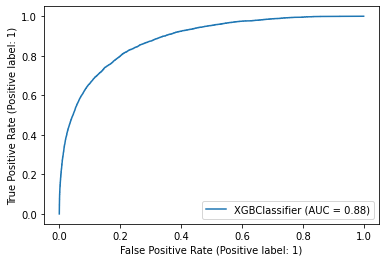

In [77]:
metrics.plot_roc_curve(xgb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred5, average=None)

### Model 6: Support Vector Classifier

In [78]:
svc = SVC()
svc.fit(X_train_res, y_train_res)

SVC()

In [79]:
y_pred6 = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred6))
print(accuracy_score(y_test, y_pred6))
print(classification_report(y_test, y_pred6))

[[17824  4893]
 [ 1595  4780]]
0.7769833631238828
              precision    recall  f1-score   support

           0       0.92      0.78      0.85     22717
           1       0.49      0.75      0.60      6375

    accuracy                           0.78     29092
   macro avg       0.71      0.77      0.72     29092
weighted avg       0.83      0.78      0.79     29092



0.7672072827898602

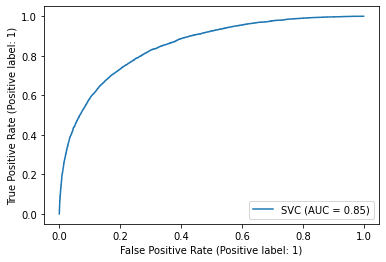

In [80]:
metrics.plot_roc_curve(svc, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred6, average=None)

In [81]:
os.makedirs("./saved_models/", exist_ok=True)

joblib.dump(cat, "./saved_models/cat.pkl")
joblib.dump(rf, "./saved_models/rf.pkl")
joblib.dump(lr, "./saved_models/logreg.pkl")
joblib.dump(gnb, "./saved_models/gnb.pkl")
joblib.dump(svc, "./saved_models/svc.pkl")
joblib.dump(xgb, "./saved_models/xgb.pkl")

['./saved_models/xgb.pkl']